In [43]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder

In [44]:
train_df = pd.read_csv('C:/Users/dideo/yeardreamsc/study_repo/5.kaggle/0002 house_price/train.csv')
test_df = pd.read_csv('C:/Users/dideo/yeardreamsc/study_repo/5.kaggle/0002 house_price/test.csv')
submission = pd.read_csv('C:/Users/dideo/yeardreamsc/study_repo/5.kaggle/0002 house_price/sample_submission.csv')

In [45]:
import copy

raw_train = copy.deepcopy(train_df)
raw_test = copy.deepcopy(test_df)

## 피쳐 엔지니어링

Text(0.5, 1.0, 'log tramsformation')

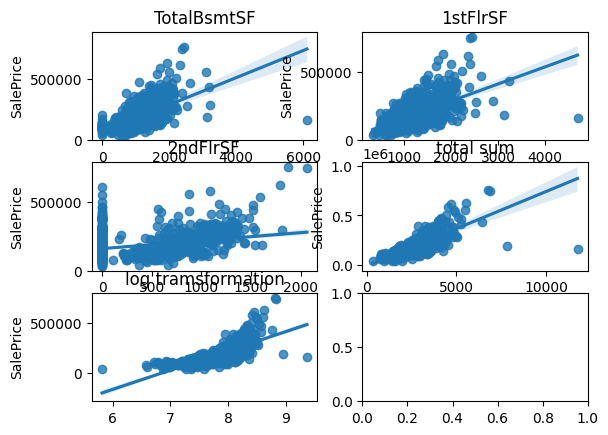

In [46]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,_)) = plt.subplots(nrows=3, ncols=2)
sns.regplot(x= train_df['TotalBsmtSF'], y=train_df['SalePrice'], ax=ax1)
ax1.set_title('TotalBsmtSF')
sns.regplot(x=train_df['1stFlrSF'], y=train_df['SalePrice'], ax=ax2)
ax2.set_title('1stFlrSF')
sns.regplot(x=train_df['2ndFlrSF'], y=train_df['SalePrice'], ax=ax3)
ax3.set_title('2ndFlrSF')
sns.regplot(x=(train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']) , y=train_df['SalePrice'], ax=ax4)
ax4.set_title('total sum')
sns.regplot(x=(np.log(train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF'])) , y=train_df['SalePrice'], ax=ax5)
ax5.set_title('log tramsformation')
# 전체 면적이 가장 큰 상관관계를 보여줌

In [94]:
# 전처리를 위해 임시로 concat
all_data = pd.concat((train_df,test_df),axis=0).reset_index(drop=True)

In [95]:
all_data['TotalSF']=all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['No2ndFlr']=(all_data['2ndFlrSF']==0)
all_data['NoBsmt']=(all_data['TotalBsmtSF']==0)

all_data.drop(['1stFlrSF','2ndFlrSF'], axis=1, inplace=True)

<Axes: ylabel='SalePrice'>

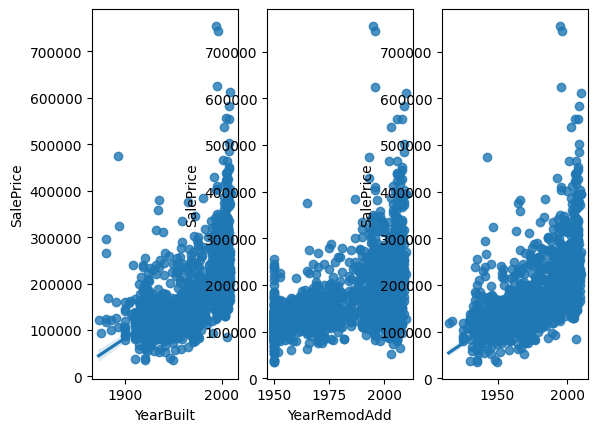

In [96]:
fig , axs = plt.subplots(nrows=1, ncols=3)
sns.regplot(x=train_df['YearBuilt'], y=train_df['SalePrice'], ax=axs[0])
sns.regplot(x=train_df['YearRemodAdd'], y=train_df['SalePrice'], ax=axs[1])
sns.regplot(x=(train_df['YearBuilt'] + train_df['YearRemodAdd'])/2, y=train_df['SalePrice'], ax=axs[2])

In [97]:
train_df['MSSubClass'].nunique()

15

<Axes: xlabel='MSSubClass', ylabel='count'>

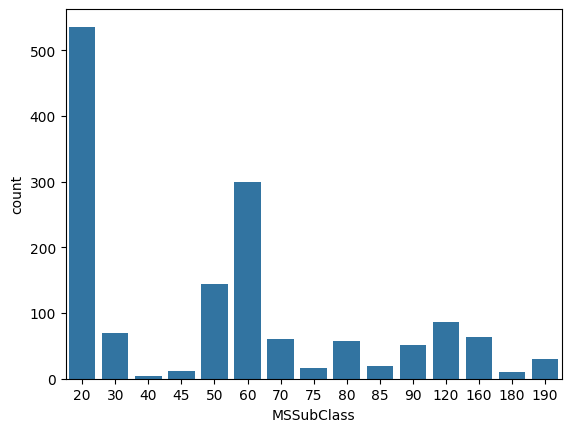

In [98]:
sns.barplot(x=train_df['MSSubClass'].value_counts().index , y=train_df['MSSubClass'].value_counts())

<Axes: xlabel='YrSold', ylabel='count'>

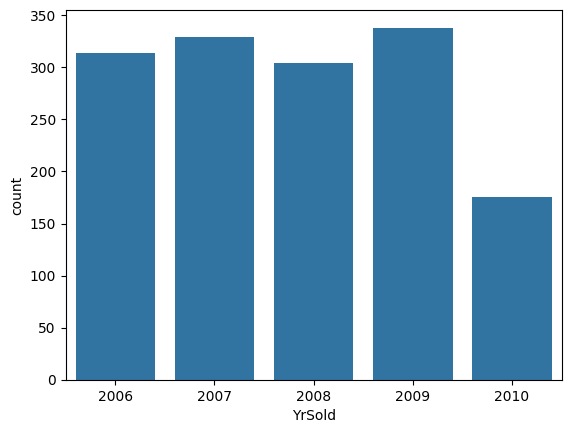

In [99]:
sns.barplot(x=train_df['YrSold'].value_counts().index , y=train_df['YrSold'].value_counts())

In [100]:
pd.DataFrame(train_df['YrSold'].value_counts())

,count
YrSold,
2009,338
2007,329
2006,314
2008,304
2010,175


In [101]:
all_data['YrBltAndRemod']=all_data['YearBuilt']+all_data['YearRemodAdd']
all_data.drop(['YrBltAndRemod','YearBuilt', 'YearRemodAdd'],axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,No2ndFlr,NoBsmt
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500.0,2566.0,False,False
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500.0,2524.0,True,False
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500.0,2706.0,False,False
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000.0,2473.0,False,False
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000.0,3343.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,6,2006,WD,Normal,NaN,1638.0,False,False
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,4,2006,WD,Abnorml,NaN,1638.0,False,False
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,9,2006,WD,Abnorml,NaN,2448.0,True,False
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,Shed,700,7,2006,WD,Normal,NaN,1882.0,True,False


In [102]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)  #빌딩 넘버는 수치적인 의미라기보단 범주형 의미
all_data['MoSold'] = all_data['MoSold'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)

In [103]:
for col in train_df.columns:
    if col.startswith('Total'):
        print(col)

TotalBsmtSF


In [104]:
Basement = ['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtUnfSF', 'TotalBsmtSF']
Bsmt = all_data[Basement]

Bsmt=Bsmt.replace(to_replace='Po', value=1)
Bsmt=Bsmt.replace(to_replace='Fa', value=2)
Bsmt=Bsmt.replace(to_replace='TA', value=3)
Bsmt=Bsmt.replace(to_replace='Gd', value=4)
Bsmt=Bsmt.replace(to_replace='Ex', value=5)
Bsmt=Bsmt.replace(to_replace='None', value=0)

Bsmt = Bsmt.replace(to_replace='No', value=1)
Bsmt = Bsmt.replace(to_replace='Mn', value=2)
Bsmt = Bsmt.replace(to_replace='Av', value=3)
Bsmt = Bsmt.replace(to_replace='Gd', value=4)

Bsmt = Bsmt.replace(to_replace='Unf', value=1)
Bsmt = Bsmt.replace(to_replace='LwQ', value=2)
Bsmt = Bsmt.replace(to_replace='Rec', value=3)
Bsmt = Bsmt.replace(to_replace='BLQ', value=4)
Bsmt = Bsmt.replace(to_replace='ALQ', value=5)
Bsmt = Bsmt.replace(to_replace='GLQ', value=6)

In [105]:
Bsmt

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtUnfSF,TotalBsmtSF
0,3.0,1.0,706.0,0.0,6.0,1.0,4.0,150.0,856.0
1,3.0,4.0,978.0,0.0,5.0,1.0,4.0,284.0,1262.0
2,3.0,2.0,486.0,0.0,6.0,1.0,4.0,434.0,920.0
3,4.0,1.0,216.0,0.0,5.0,1.0,3.0,540.0,756.0
4,3.0,3.0,655.0,0.0,6.0,1.0,4.0,490.0,1145.0
...,...,...,...,...,...,...,...,...,...
2914,3.0,1.0,0.0,0.0,1.0,1.0,3.0,546.0,546.0
2915,3.0,1.0,252.0,0.0,3.0,1.0,3.0,294.0,546.0
2916,3.0,1.0,1224.0,0.0,5.0,1.0,3.0,0.0,1224.0
2917,3.0,3.0,337.0,0.0,6.0,1.0,4.0,575.0,912.0


In [106]:
# 점수부여, 곱

Bsmt['BsmtScore'] = Bsmt['BsmtQual'] * Bsmt['BsmtCond'] * Bsmt['TotalBsmtSF']
all_data['BsmtScore'] = Bsmt['BsmtScore']

Bsmt['BsmtFin'] = (Bsmt['BsmtFinSF1'] * Bsmt['BsmtFinType1']) + (Bsmt['BsmtFinSF2'] * Bsmt['BsmtFinType2'])
all_data['BsmtFinScore'] = Bsmt['BsmtFin']
all_data['BsmtDNF']=(all_data['BsmtFinScore']==0)

all_data.drop(Basement, axis=1, inplace=True)

In [107]:
lot=['LotFrontage', 'LotArea','LotConfig','LotShape']
Lot=all_data[lot]

Lot['LotScore'] = np.log((Lot['LotFrontage'] * Lot['LotArea'])+1)
all_data['LotScore']=Lot['LotScore']

all_data.drop(lot, axis=1, inplace=True)

In [108]:
garage=['GarageArea','GarageCars','GarageCond','GarageFinish','GarageQual','GarageType','GarageYrBlt']
Garage=all_data[garage]
all_data['NoGarage']=(all_data['GarageArea']==0)


Garage=Garage.replace(to_replace='Po', value=1)
Garage=Garage.replace(to_replace='Fa', value=2)
Garage=Garage.replace(to_replace='TA', value=3)
Garage=Garage.replace(to_replace='Gd', value=4)
Garage=Garage.replace(to_replace='Ex', value=5)
Garage=Garage.replace(to_replace='None', value=0)

Garage=Garage.replace(to_replace='Unf', value=1)
Garage=Garage.replace(to_replace='RFn', value=2)
Garage=Garage.replace(to_replace='Fin', value=3)

Garage=Garage.replace(to_replace='CarPort', value=1)
Garage=Garage.replace(to_replace='Basment', value=4)
Garage=Garage.replace(to_replace='Detchd', value=2)
Garage=Garage.replace(to_replace='2Types', value=3)
Garage=Garage.replace(to_replace='Basement', value=5)
Garage=Garage.replace(to_replace='Attchd', value=6)
Garage=Garage.replace(to_replace='BuiltIn', value=7)

In [109]:
Garage['GarageScore']=(Garage['GarageArea']) * (Garage['GarageCars']) * (Garage['GarageFinish'])*(Garage['GarageQual']) * \
(Garage['GarageType'])
all_data['GarageScore']=Garage['GarageScore']


all_data.drop(garage, axis=1, inplace=True)

In [110]:
# target log transformation
all_data['SalePrice'] = np.log1p(all_data['SalePrice'])

In [111]:
cnt = 0
for col in train_df.columns:
    percent = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (train_df[col].isnull().sum() / train_df[col].shape[0]))
    if percent[-5:] != '0.00%':  ## string.find('0.00%') == -1 
        print(percent)
        cnt +=1

print()
print(f'결측치가 포함된 칼럼의 갯수 : {cnt}')

column: LotFrontage	 Percent of NaN value: 17.74%
column:      Alley	 Percent of NaN value: 93.77%
column: MasVnrType	 Percent of NaN value: 59.73%
column: MasVnrArea	 Percent of NaN value: 0.55%
column:   BsmtQual	 Percent of NaN value: 2.53%
column:   BsmtCond	 Percent of NaN value: 2.53%
column: BsmtExposure	 Percent of NaN value: 2.60%
column: BsmtFinType1	 Percent of NaN value: 2.53%
column: BsmtFinType2	 Percent of NaN value: 2.60%
column: Electrical	 Percent of NaN value: 0.07%
column: FireplaceQu	 Percent of NaN value: 47.26%
column: GarageType	 Percent of NaN value: 5.55%
column: GarageYrBlt	 Percent of NaN value: 5.55%
column: GarageFinish	 Percent of NaN value: 5.55%
column: GarageQual	 Percent of NaN value: 5.55%
column: GarageCond	 Percent of NaN value: 5.55%
column:     PoolQC	 Percent of NaN value: 99.52%
column:      Fence	 Percent of NaN value: 80.75%
column: MiscFeature	 Percent of NaN value: 96.30%

결측치가 포함된 칼럼의 갯수 : 19


In [112]:
#Null값이 많은 column삭제
all_data.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1, inplace=True)

In [113]:
all_data

,MSSubClass,MSZoning,Street,LandContour,Utilities,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,TotalSF,No2ndFlr,NoBsmt,YrBltAndRemod,BsmtScore,BsmtFinScore,BsmtDNF,LotScore,NoGarage,GarageScore
0,60,RL,Pave,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,1Fam,...,2566.0,False,False,4006,10272.0,4236.0,False,13.216311,False,39456.0
1,20,RL,Pave,Lvl,AllPub,Gtl,Veenker,Feedr,Norm,1Fam,...,2524.0,True,False,3952,15144.0,4890.0,False,13.551546,False,33120.0
2,60,RL,Pave,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,1Fam,...,2706.0,False,False,4003,11040.0,2916.0,False,13.547632,False,43776.0
3,70,RL,Pave,Lvl,AllPub,Gtl,Crawfor,Norm,Norm,1Fam,...,2473.0,False,False,3885,9072.0,1080.0,False,13.258643,False,11556.0
4,60,RL,Pave,Lvl,AllPub,Gtl,NoRidge,Norm,Norm,1Fam,...,3343.0,False,False,4000,13740.0,3930.0,False,13.996031,False,90288.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,Pave,Lvl,AllPub,Gtl,MeadowV,Norm,Norm,Twnhs,...,1638.0,False,False,3940,4914.0,0.0,True,10.612926,True,NaN
2915,160,RM,Pave,Lvl,AllPub,Gtl,MeadowV,Norm,Norm,TwnhsE,...,1638.0,False,False,3940,4914.0,756.0,False,10.590994,False,858.0
2916,20,RL,Pave,Lvl,AllPub,Gtl,Mitchel,Norm,Norm,1Fam,...,2448.0,True,False,3956,11016.0,6120.0,False,14.978662,False,6912.0
2917,85,RL,Pave,Lvl,AllPub,Gtl,Mitchel,Norm,Norm,1Fam,...,1882.0,True,False,3984,10944.0,2022.0,False,13.380632,True,NaN


In [114]:
all_data.shape

(2919, 63)

In [130]:
#Numerical column은 평균으로 대체
print(all_data.isnull().sum().sum())
all_data.fillna(all_data.mean(numeric_only=True), inplace=True)  #Data Leakage의 방지를 위해서는 원래는 반드시 train data의 정보만을 사용해야 한다. 

2589


In [224]:
train = pd.DataFrame({"색상" : ["빨강","파랑","빨강","파랑","검정"]})
test = pd.DataFrame({"색상": ["빨강","파랑","초록"]})

In [ ]:
ohe

In [134]:
#Categorical column의 결측치 처리
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

#OneHot Encoding전 shape
print('OneHot Encoding 전 트레인 데이터 shape',all_data.shape)

cat_cols = [col for col in all_data.columns if all_data[col].dtypes == 'object']
num_cols = [col for col in all_data.columns if all_data[col].dtypes != 'object']


ohe.fit(all_data[cat_cols])
encoded_columns = ohe.transform(all_data[cat_cols])
feature_names = ohe.get_feature_names_out()
encoded_columns = pd.DataFrame(encoded_columns, columns=feature_names)

all_data.drop(cat_cols, axis=1, inplace=True)                      


# all_data의 중복된 인덱스 제거
all_data = all_data[~all_data.index.duplicated()]

# encoded_columns의 중복된 인덱스 제거
encoded_columns = encoded_columns[~encoded_columns.index.duplicated()]

# 두 데이터 프레임 결합
all_data = pd.concat([all_data, encoded_columns], axis=1)

#OneHot Encoding이후 shape
print('OneHot Encoding 후 트레인 데이터 shape',all_data.shape)

OneHot Encoding 전 트레인 데이터 shape (2919, 63)
OneHot Encoding 후 트레인 데이터 shape (2919, 256)


In [217]:
all_data[['Utilities_AllPub','Utilities_NoSeWa', 'Utilities_nan']]

,Utilities_AllPub,Utilities_NoSeWa,Utilities_nan
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
2914,1.0,0.0,0.0
2915,1.0,0.0,0.0
2916,1.0,0.0,0.0
2917,1.0,0.0,0.0


In [222]:
all_data.loc[all_data['Utilities_nan'] == 1.0, ['Utilities_AllPub','Utilities_NoSeWa']]


,Utilities_AllPub,Utilities_NoSeWa
1915,0.0,0.0
1945,0.0,0.0


In [136]:
all_data.isnull().sum().sum() ##결측치가 모두 채워짐

0

In [137]:
from scipy.stats import skew

skew_features = all_data[num_cols].apply(lambda x: skew(x))
# skewness가 1 이상인 칼럼 추출
skew_features_top = skew_features[skew_features >1]

In [138]:
skew_features

OverallQual       0.197110
OverallCond       0.570312
YearBuilt        -0.599806
YearRemodAdd     -0.451020
MasVnrArea        2.611351
LowQualFinSF     12.088761
GrLivArea         1.269358
BsmtFullBath      0.623973
BsmtHalfBath      3.931374
FullBath          0.167606
HalfBath          0.694566
BedroomAbvGr      0.326324
KitchenAbvGr      4.302254
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
WoodDeckSF        1.842433
OpenPorchSF       2.535114
EnclosedPorch     4.003891
3SsnPorch        11.376065
ScreenPorch       3.946694
PoolArea         16.898328
MiscVal          21.947195
SalePrice         0.000685
TotalSF           1.515609
No2ndFlr         -0.288675
NoBsmt            5.869458
YrBltAndRemod    -0.304307
BsmtScore         2.158259
BsmtFinScore      1.712181
BsmtDNF           0.917383
LotScore         -1.254539
NoGarage          3.955907
GarageScore       1.777560
dtype: float64

In [139]:
skew_features_top

MasVnrArea        2.611351
LowQualFinSF     12.088761
GrLivArea         1.269358
BsmtHalfBath      3.931374
KitchenAbvGr      4.302254
WoodDeckSF        1.842433
OpenPorchSF       2.535114
EnclosedPorch     4.003891
3SsnPorch        11.376065
ScreenPorch       3.946694
PoolArea         16.898328
MiscVal          21.947195
TotalSF           1.515609
NoBsmt            5.869458
BsmtScore         2.158259
BsmtFinScore      1.712181
NoGarage          3.955907
GarageScore       1.777560
dtype: float64

In [140]:
# skew feature의 log transformation
all_data[skew_features_top.index] = np.log1p(all_data[skew_features_top.index])

In [141]:
print(train_df.shape, test_df.shape)
train_df=all_data[:len(train_df)]
test_df=all_data[len(train_df):]
print(train_df.shape, test_df.shape)

(1460, 81) (1459, 80)
(1460, 256) (1459, 256)


## 선형 회귀 모델

In [142]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, '로그 변환된 RMSE(RMSLE):', np.round(rmse,3))
    return rmse
    
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [143]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = train_df['SalePrice']
X_features = train_df.drop('SalePrice',axis=1, inplace=False)
X_train, X_test , y_train, y_test = train_test_split(X_features,y_target,test_size=0.2, random_state=42)



#model define
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg,ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE(RMSLE): 203089.513
Ridge 로그 변환된 RMSE(RMSLE): 0.127
Lasso 로그 변환된 RMSE(RMSLE): 0.328


[203089.51297122397, 0.1272323206479319, 0.32803277814531506]

In [144]:
def get_coef(model, n=10):
    coef = pd.Series(model.coef_, index = X_features.columns)
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    
    return coef_high,coef_low

def visualize_coef(models):
    fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()
    
    for i, model in enumerate(models):
        coef_high, coef_low = get_coef(model)
        coef_concat = pd.concat([coef_high,coef_low])
        
        axs[i].set_title(model.__class__.__name__+'Coefficients', size=25)
        axs[i].tick_params(axis='y', direction='in', pad=-120)
        
        for label in (axs[i].get_xticklabels() + axs[i].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i])

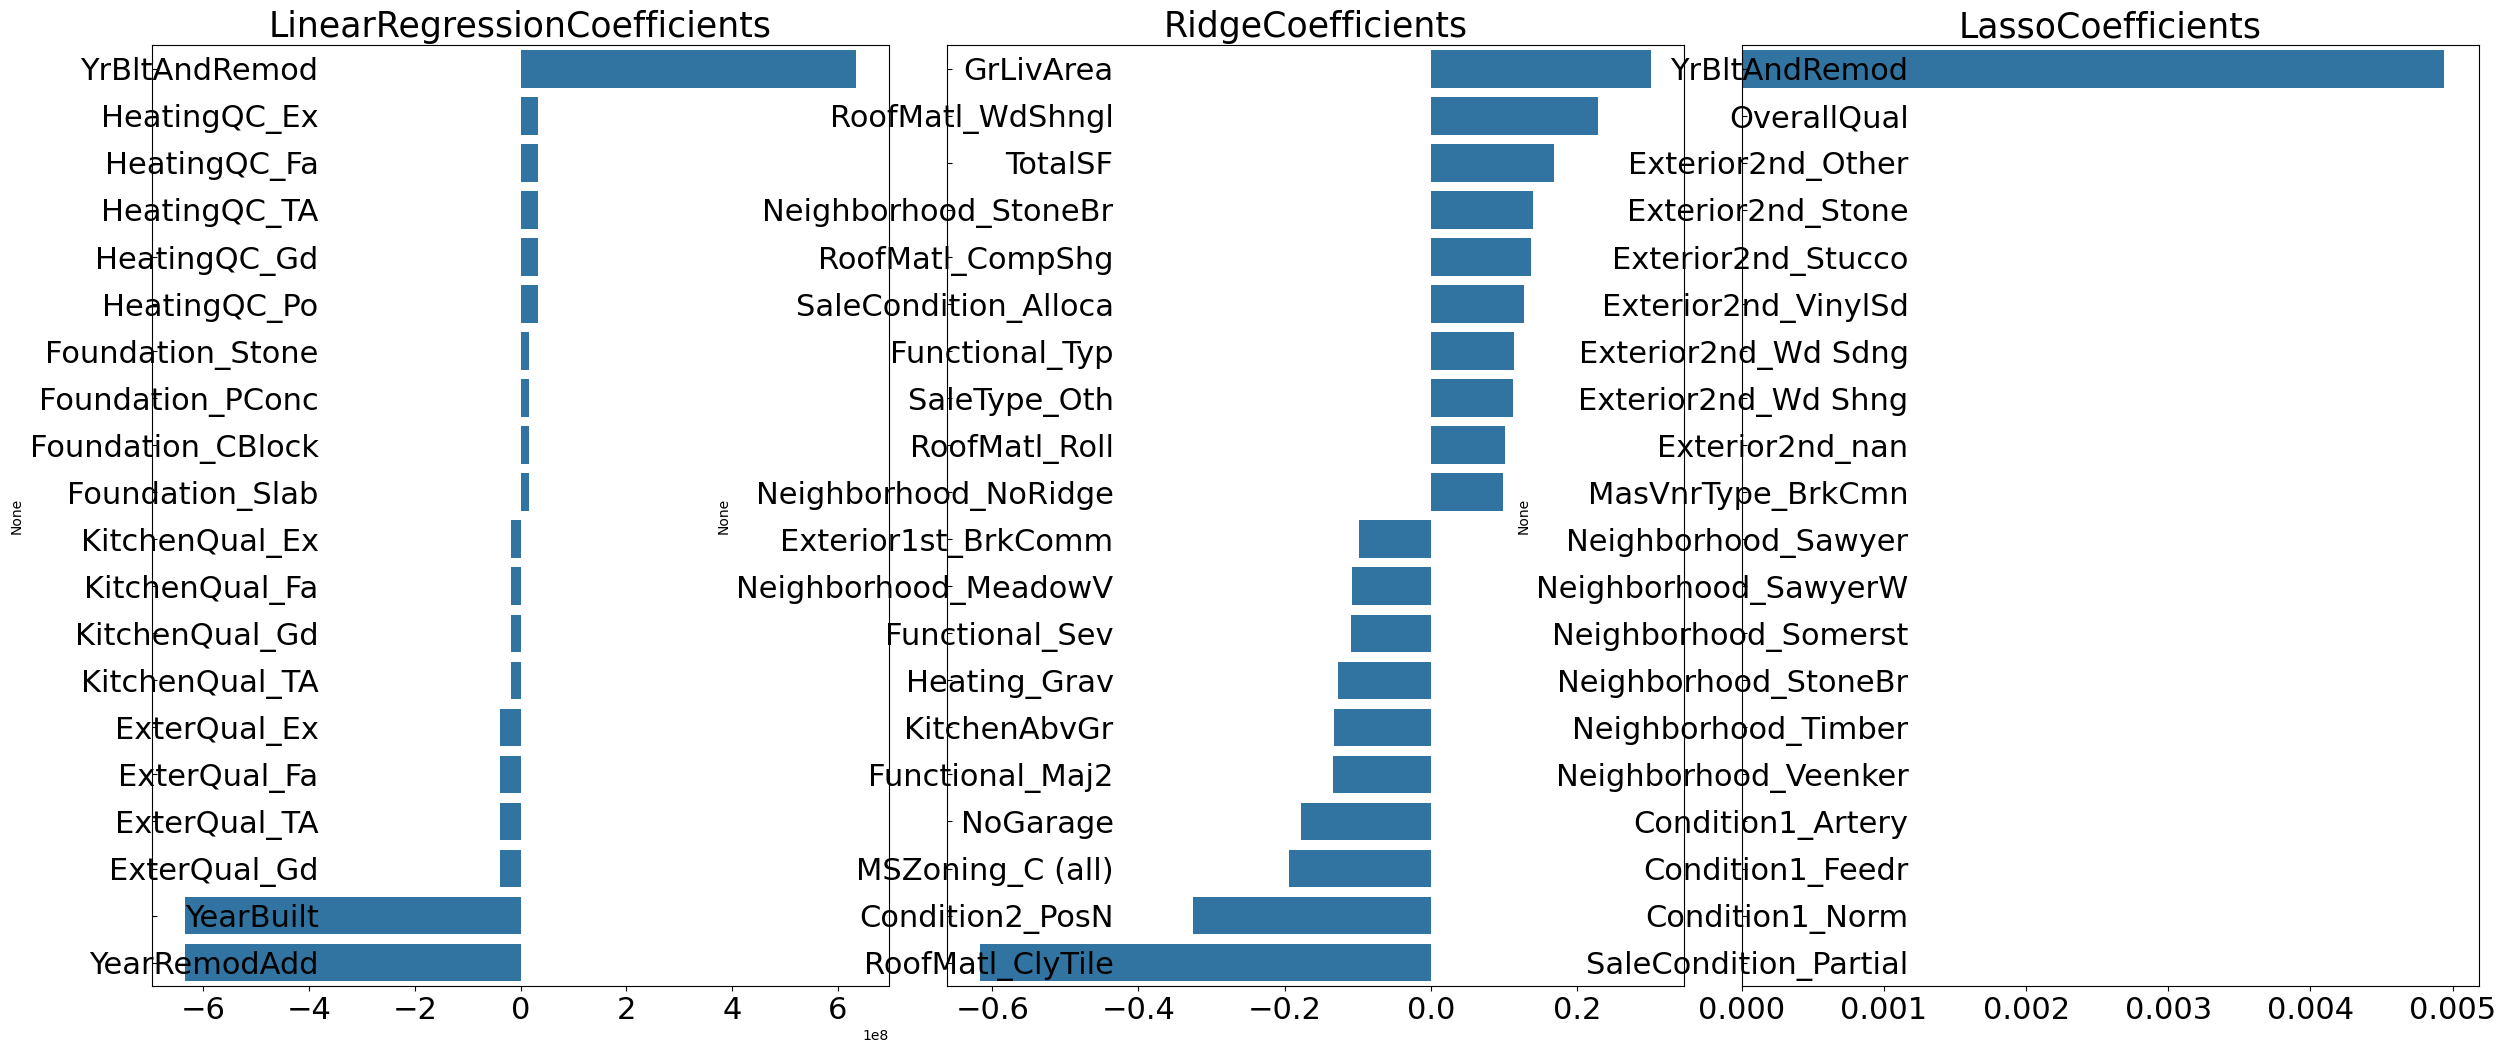

In [145]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coef(models)

In [146]:
from sklearn.model_selection import GridSearchCV


def print_best_params(model,params):
    grid_model = GridSearchCV(model,param_grid=params,
                              scoring='neg_mean_squared_error',cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} 5 CV시 최적 평균 RMSE 값 : {1}, 최적 alpha :{2}'.format(model.__class__.__name__, np.round(rmse,4),grid_model.best_params_))
    

In [147]:
ridge_params= { 'alpha' : [0.05, 0.1, 1, 5, 8 ,10, 12 ,15, 20]}
lasso_params= { 'alpha' : [0.001,0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

In [148]:
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV시 최적 평균 RMSE 값 : 0.13, 최적 alpha :{'alpha': 8}
Lasso 5 CV시 최적 평균 RMSE 값 : 0.128, 최적 alpha :{'alpha': 0.001}


In [149]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg,ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE(RMSLE): 203089.513
Ridge 로그 변환된 RMSE(RMSLE): 0.131
Lasso 로그 변환된 RMSE(RMSLE): 0.132


[203089.51297122397, 0.1306720329704437, 0.13228658381316746]

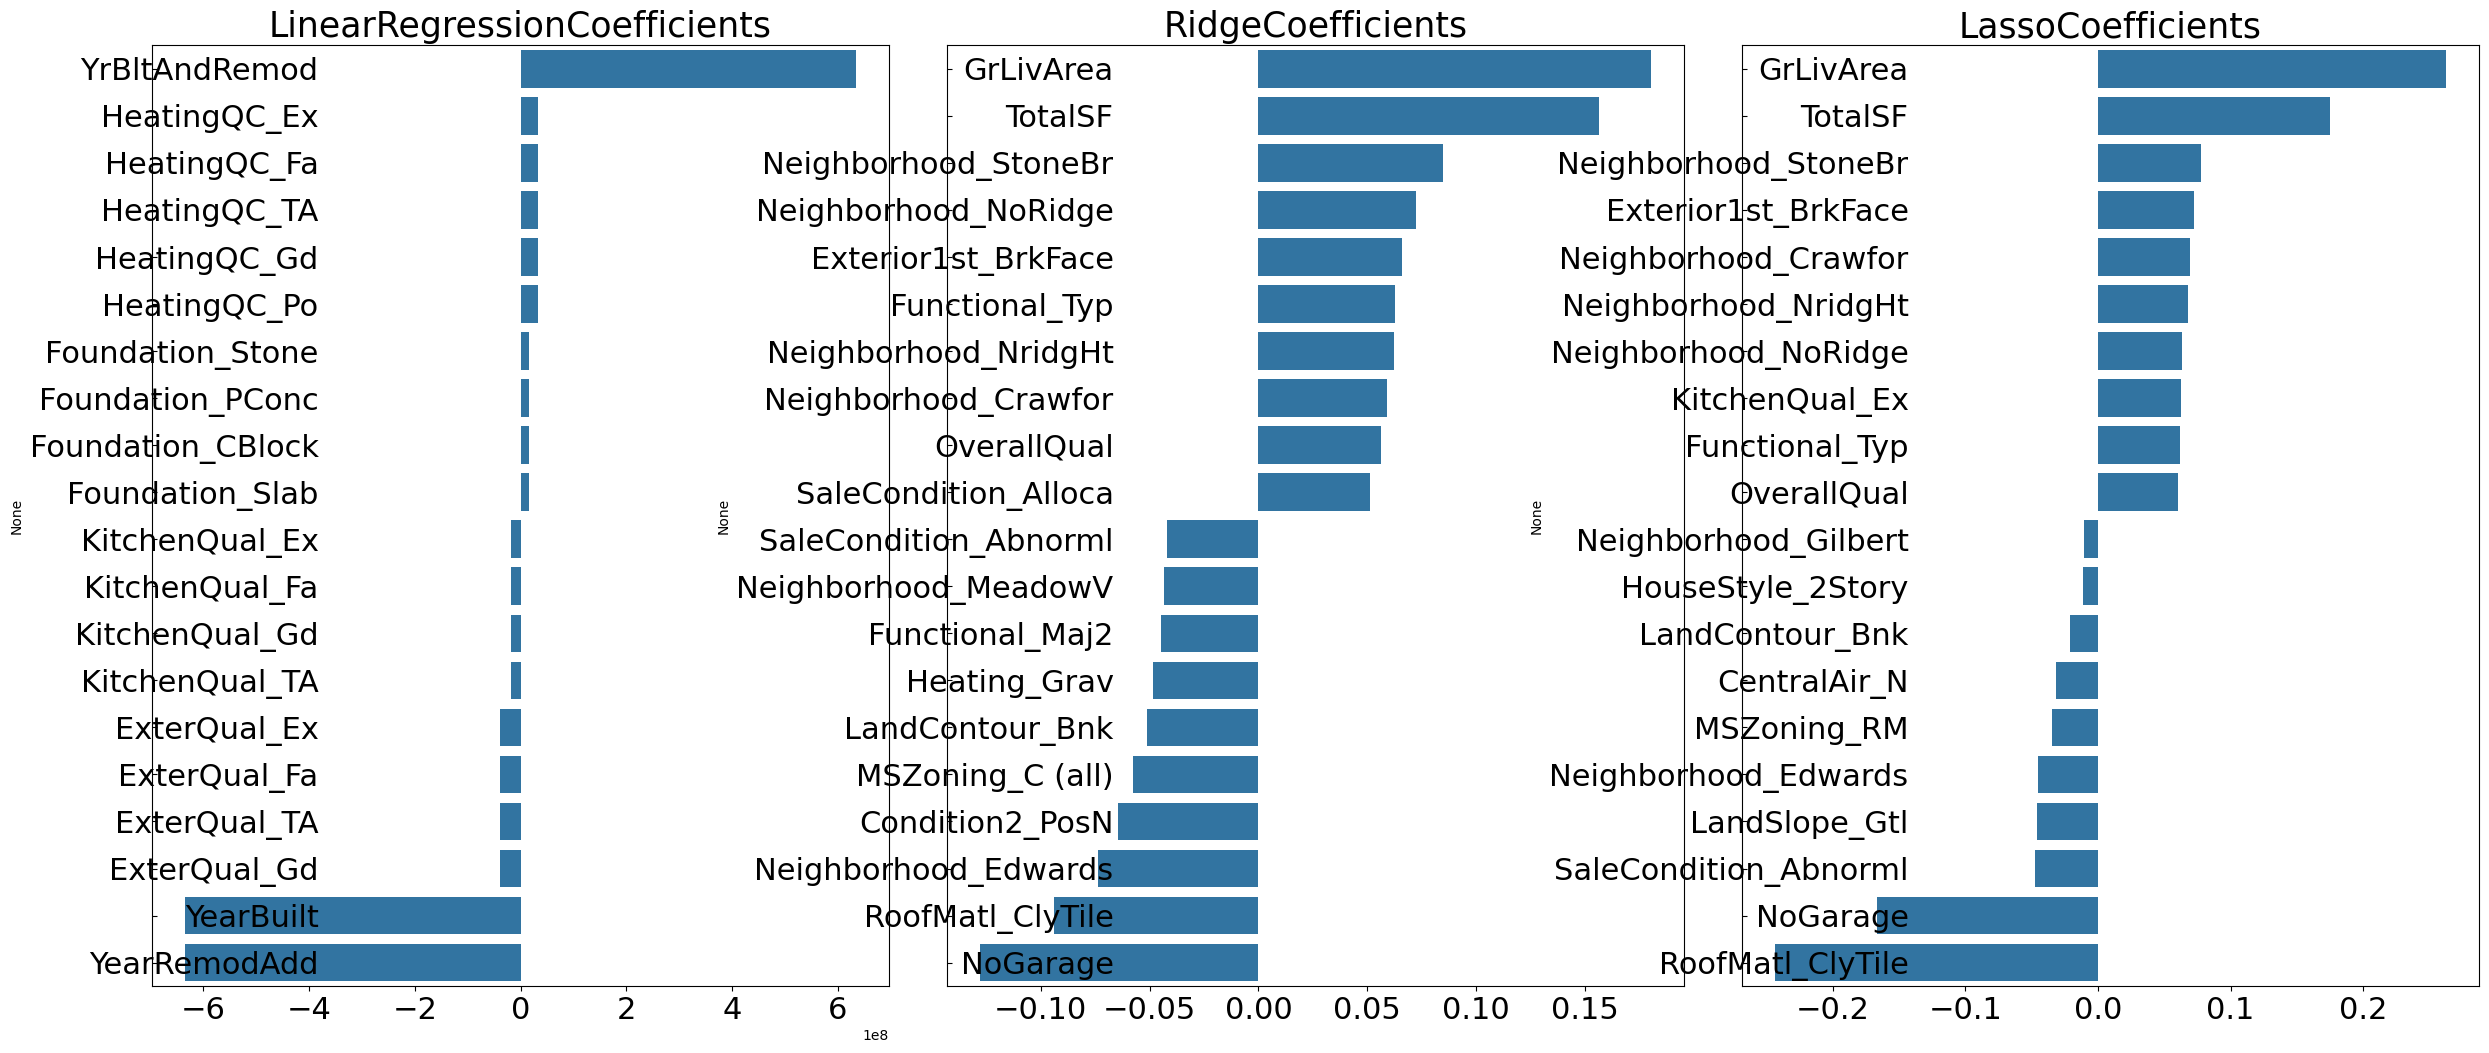

In [150]:
visualize_coef(models)

In [151]:
y_target = train_df['SalePrice']
X_features = train_df.drop('SalePrice',axis=1, inplace=False)
X_train, X_test , y_train, y_test = train_test_split(X_features,y_target,test_size=0.2, random_state=42)

In [152]:
ridge_params= { 'alpha' : [0.05, 0.1, 1, 5, 8 ,10, 12 ,15, 20]}
lasso_params= { 'alpha' : [0.001,0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV시 최적 평균 RMSE 값 : 0.13, 최적 alpha :{'alpha': 8}
Lasso 5 CV시 최적 평균 RMSE 값 : 0.128, 최적 alpha :{'alpha': 0.001}


In [153]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg,ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE(RMSLE): 203089.513
Ridge 로그 변환된 RMSE(RMSLE): 0.13
Lasso 로그 변환된 RMSE(RMSLE): 0.132


[203089.51297122397, 0.1303938889873798, 0.13228658381316746]

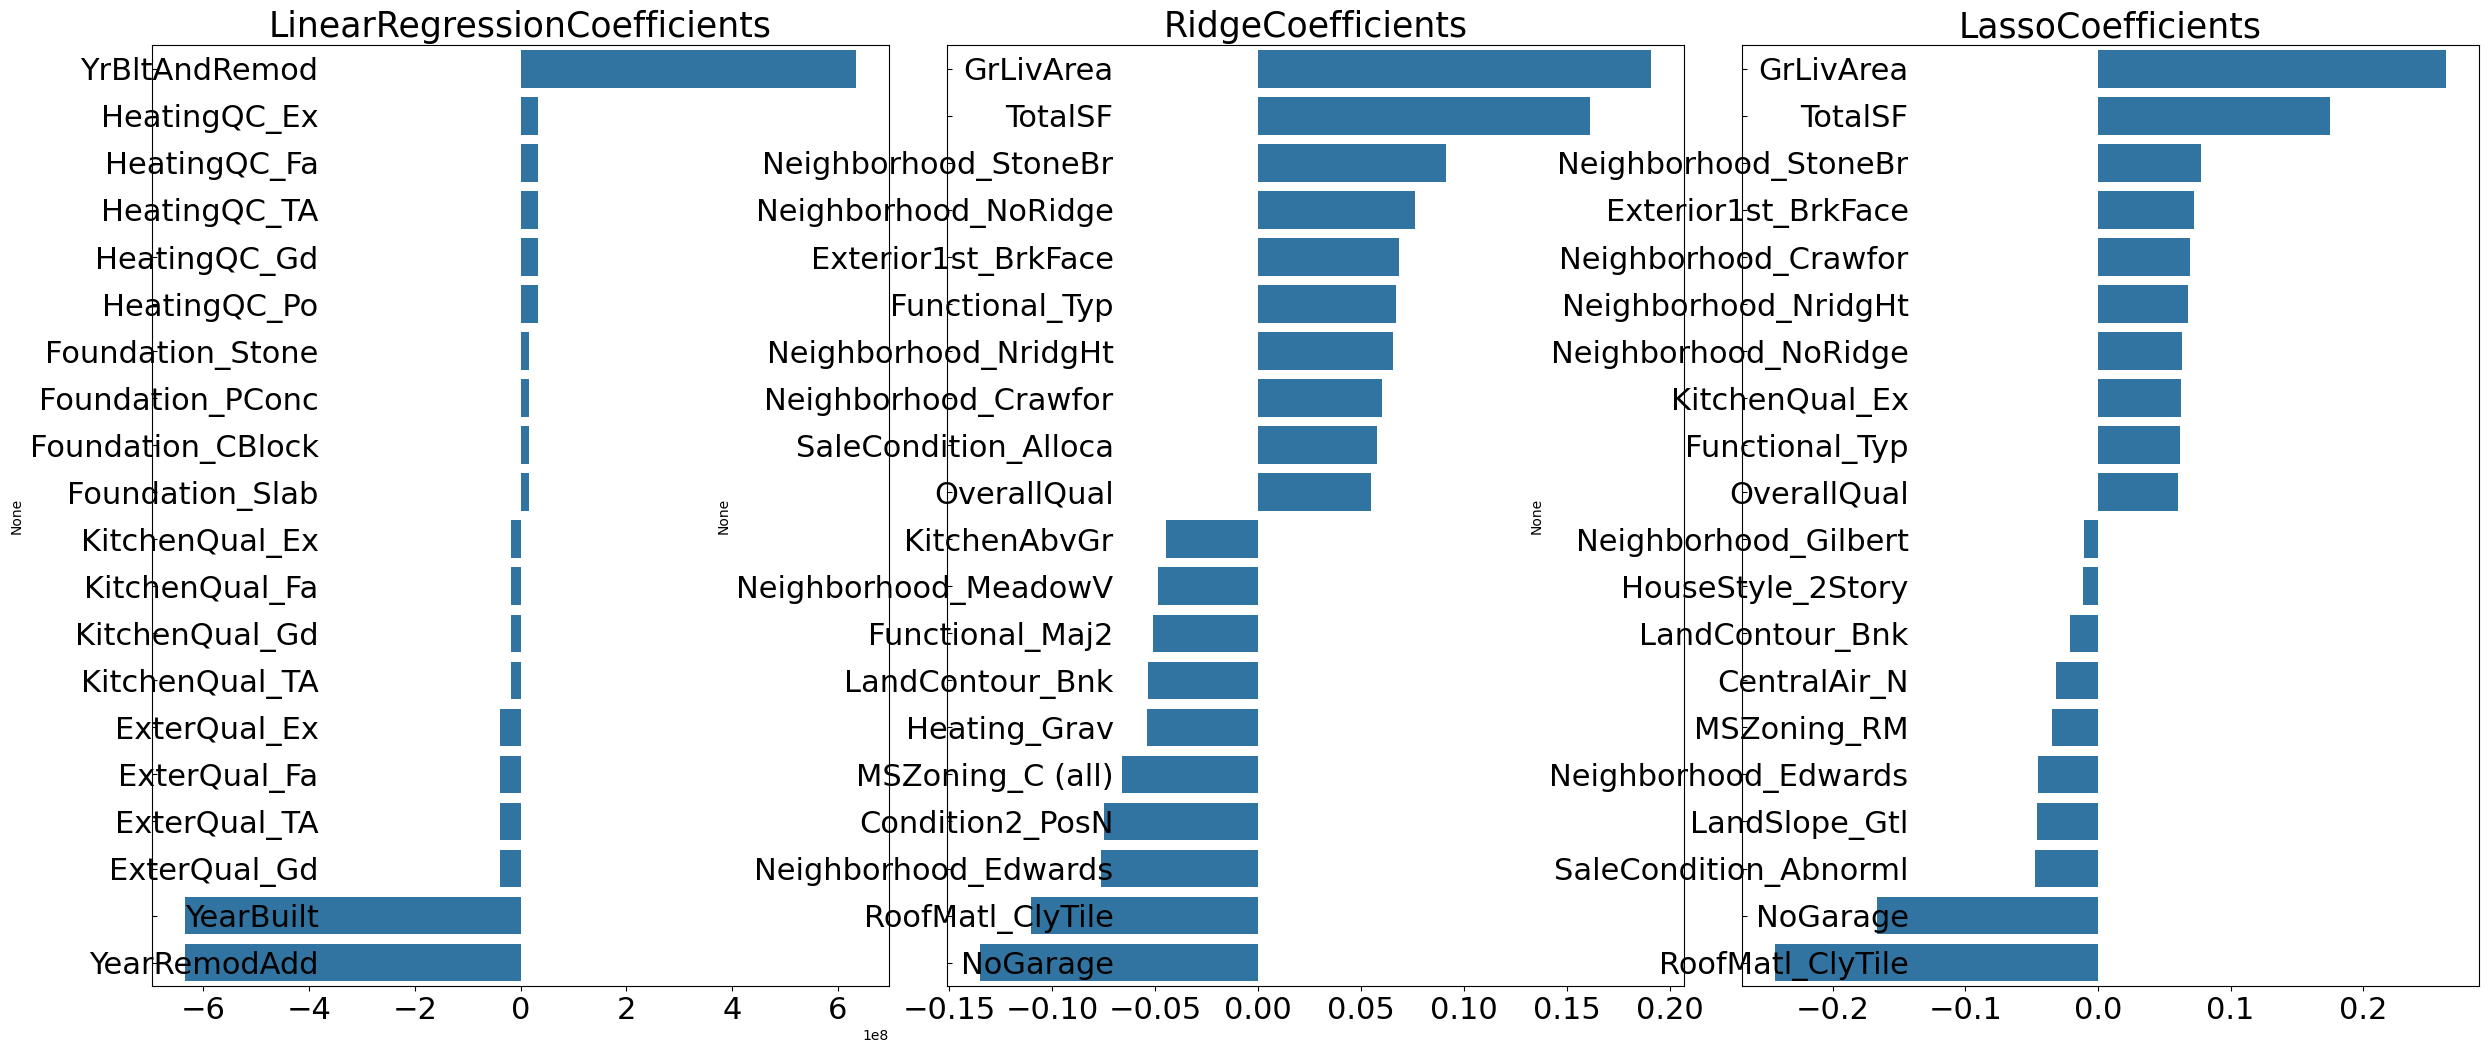

In [154]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coef(models)

단변량 분석

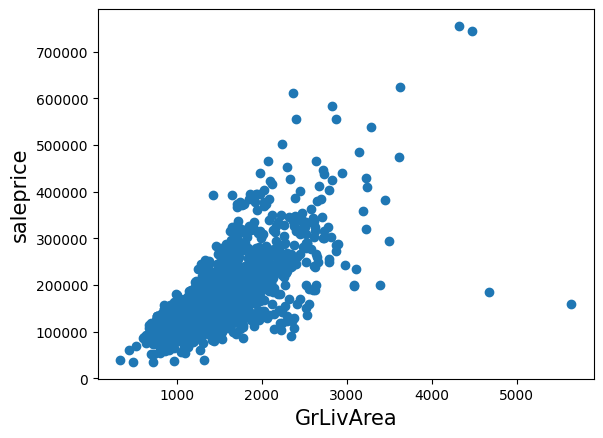

In [155]:
plt.scatter(x= raw_train['GrLivArea'], y=raw_train['SalePrice']) #원본 데이터
plt.ylabel('saleprice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

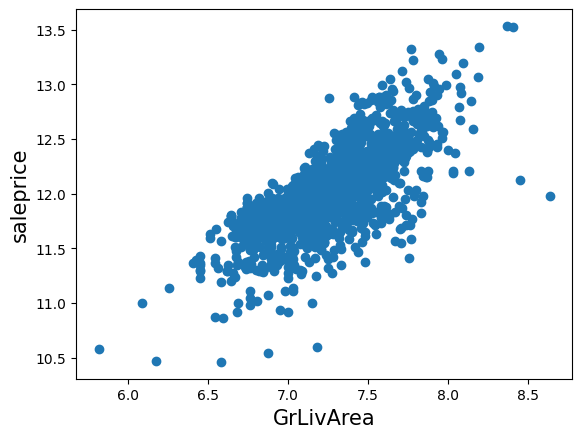

In [156]:
plt.scatter(x= train_df['GrLivArea'], y=train_df['SalePrice']) #원본 데이터
plt.ylabel('saleprice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [157]:
cond1 = raw_train['GrLivArea']> 4000
cond2 = raw_train['SalePrice']< 500000
outlier_index = raw_train[cond1&cond2].index
outlier_index

Index([523, 1298], dtype='int64')

In [158]:
train_df.drop(outlier_index, axis=0, inplace=True)

## 이상치 제거

In [159]:
# 이상치 제거후 피쳐 다시 생성
y_target = train_df['SalePrice']
X_features = train_df.drop('SalePrice',axis=1, inplace=False)
X_train, X_test , y_train, y_test = train_test_split(X_features,y_target,test_size=0.2, random_state=42)

In [160]:
ridge_params= { 'alpha' : [0.05, 0.1, 1, 5, 8 ,10, 12 ,15, 20]}
lasso_params= { 'alpha' : [0.001,0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV시 최적 평균 RMSE 값 : 0.117, 최적 alpha :{'alpha': 8}
Lasso 5 CV시 최적 평균 RMSE 값 : 0.1167, 최적 alpha :{'alpha': 0.001}


In [161]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg,ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE(RMSLE): 297751.604
Ridge 로그 변환된 RMSE(RMSLE): 0.119
Lasso 로그 변환된 RMSE(RMSLE): 0.119


[297751.60366298317, 0.11871708500340741, 0.11907386012122202]

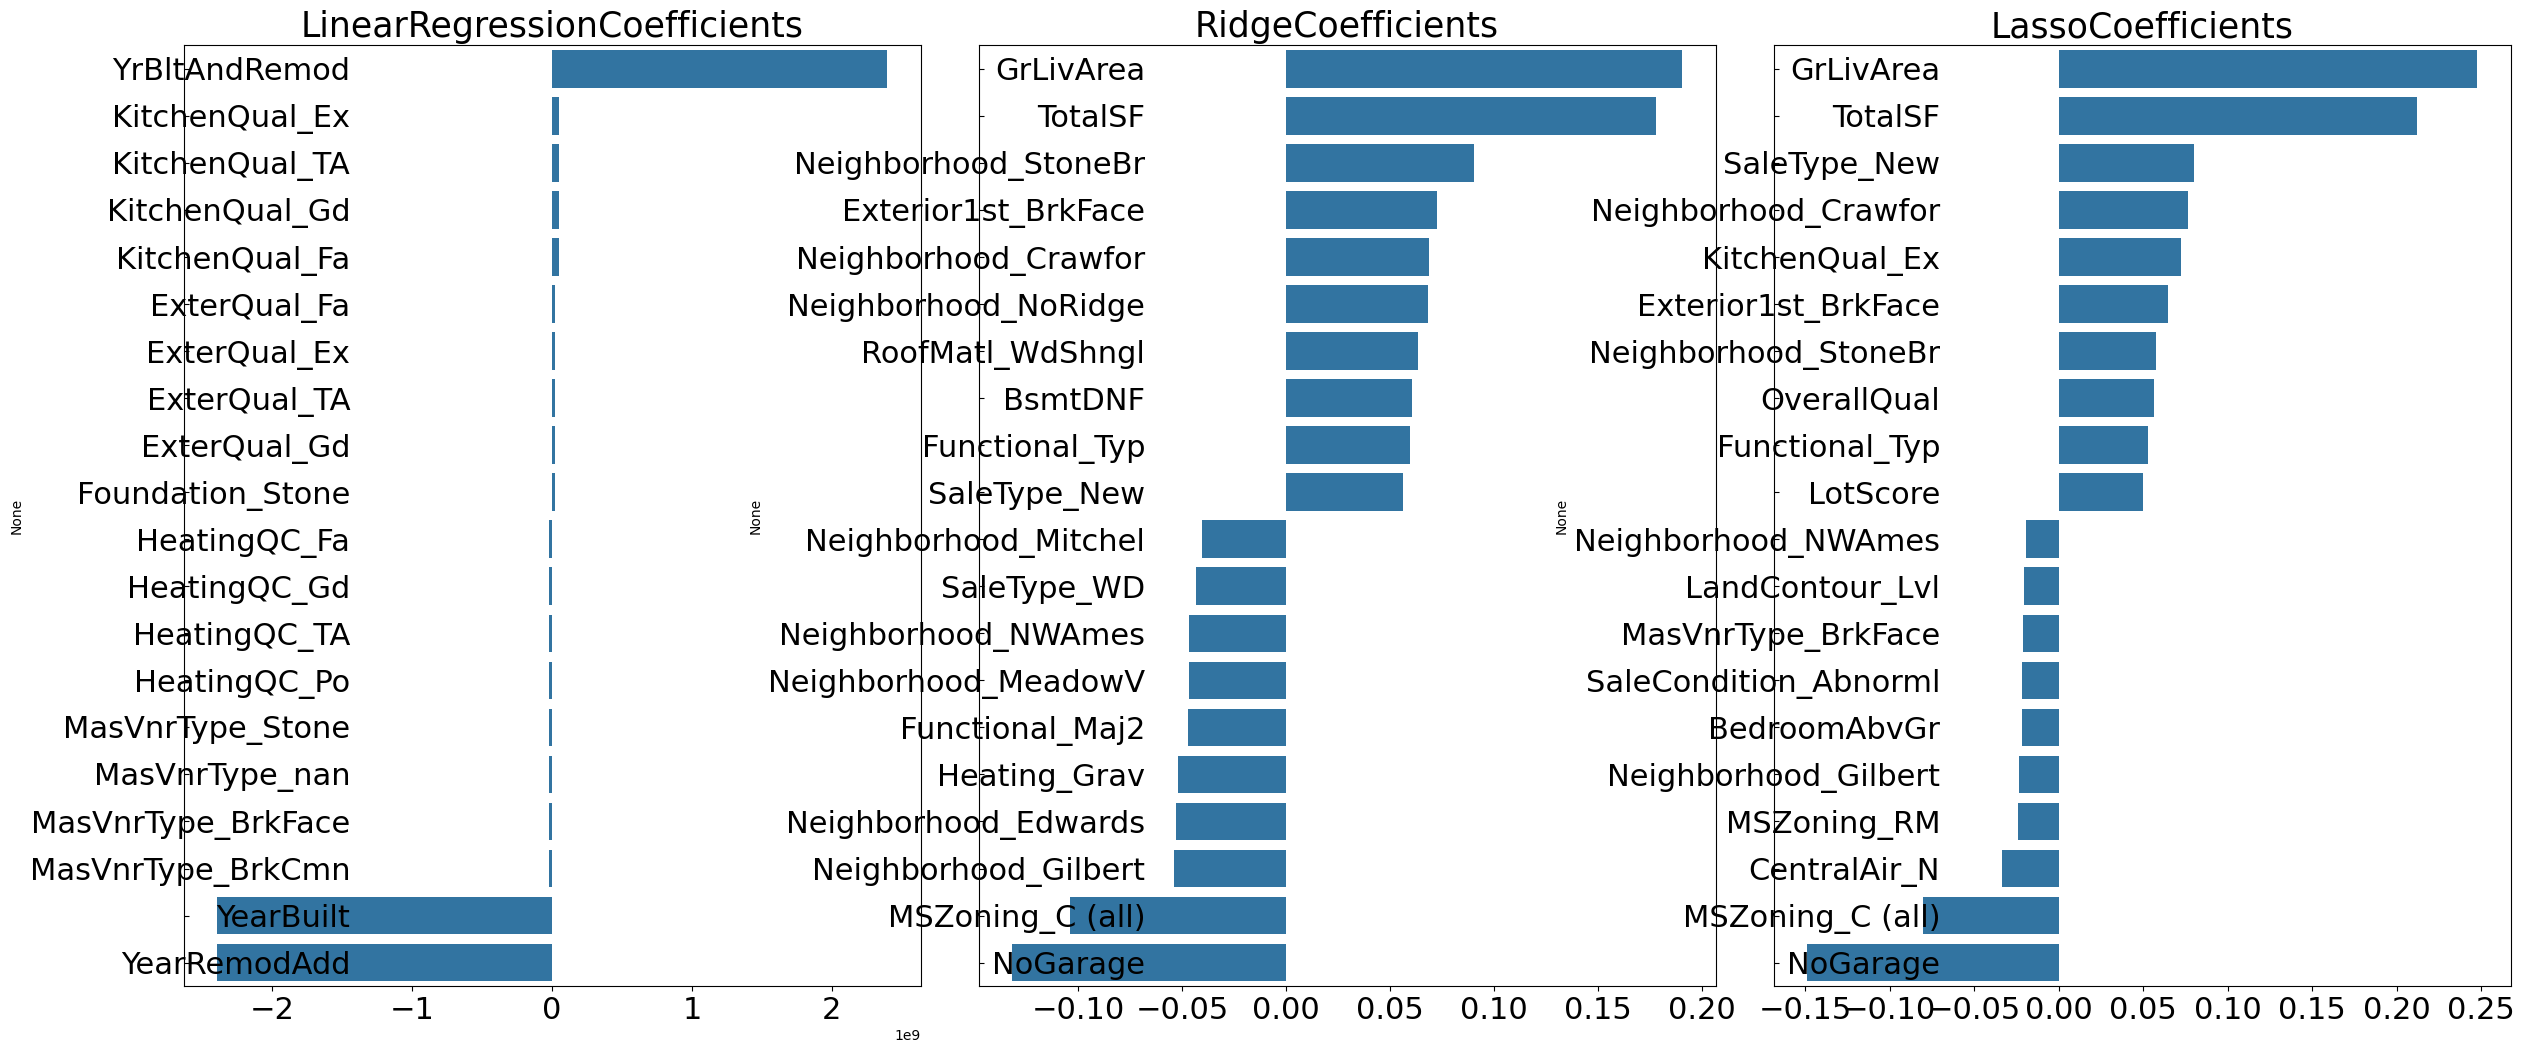

In [162]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coef(models)

# 트리기반 모델

In [163]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
print_best_params(xgb_reg,xgb_params)

XGBRegressor 5 CV시 최적 평균 RMSE 값 : 0.1195, 최적 alpha :{'n_estimators': 1000}


In [164]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=1)

print_best_params(lgbm_reg,lgbm_params)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 157
[LightGBM] [Info] Start training from score 12.021352
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2618
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 154
[LightGBM] [Info] Start training from score 12.023516
[LightGBM] [Warning] Found

# 앙상블

### 회귀모델 앙상블

In [165]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test, pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE : {1}'.format(key,rmse))

In [166]:
# 개별 모델 피팅
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출 
pred = 0.4*ridge_pred + 0.6*lasso_pred
preds = {'최종 혼합':pred, 'Ridge': ridge_pred, 'Lasso':lasso_pred}


get_rmse_pred(preds)

최종 혼합 모델의 RMSE : 0.11760249905676855
Ridge 모델의 RMSE : 0.11871708500340741
Lasso 모델의 RMSE : 0.11907386012122202


In [167]:
pred = 0.3*ridge_pred + 0.7*lasso_pred
preds = {'최종 혼합':pred, 'Ridge': ridge_pred, 'Lasso':lasso_pred}


get_rmse_pred(preds)

최종 혼합 모델의 RMSE : 0.11780542952891324
Ridge 모델의 RMSE : 0.11871708500340741
Lasso 모델의 RMSE : 0.11907386012122202


In [168]:
pred = 0.2*ridge_pred + 0.8*lasso_pred
preds = {'최종 혼합':pred, 'Ridge': ridge_pred, 'Lasso':lasso_pred}


get_rmse_pred(preds)

최종 혼합 모델의 RMSE : 0.11811893344062914
Ridge 모델의 RMSE : 0.11871708500340741
Lasso 모델의 RMSE : 0.11907386012122202


### 트리 모델 앙상블

In [169]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambmda=10, n_jobs=1)


xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)

xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5*xgb_pred + 0.5*lgbm_pred
preds = {'최종혼합': pred,
         'XGBM' : xgb_pred,
         'LGBM' : lgbm_pred}

get_rmse_pred(preds)

[LightGBM] [Warning] Unknown parameter: reg_lambmda
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: reg_lambmda
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 155
[LightGBM] [Info] Start training from score 12.023362
[LightGBM] [Warning] Unknown parameter: reg_lambmda
최종혼합 모델의 RMSE : 0.1195203963510622
XGBM 모델의 RMSE : 0.1221953213324665
LGBM 모델의 RMSE : 0.12115485330483447


In [170]:
pred = 0.6*xgb_pred + 0.4*lgbm_pred
preds = {'최종혼합': pred,
         'XGBM' : xgb_pred,
         'LGBM' : lgbm_pred}

get_rmse_pred(preds)

최종혼합 모델의 RMSE : 0.11971318011721414
XGBM 모델의 RMSE : 0.1221953213324665
LGBM 모델의 RMSE : 0.12115485330483447


## Optuna를 활용한 하이퍼파라미터 튜닝후 재 앙상블

In [171]:
import optuna

In [172]:
def objective(trial):
    params = {
        "objective": "reg:squarederror",
        "n_estimators": 1000,
        "verbosity": 0,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
    }

    model = XGBRegressor(**params)
    model.fit(X_train, y_train, verbose=False)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return rmse

In [173]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2024-03-15 13:48:58,398] A new study created in memory with name: no-name-5ad15f4c-f57d-42b0-917c-e002e7ac76d7
[I 2024-03-15 13:49:00,772] Trial 0 finished with value: 0.13538475513851111 and parameters: {'learning_rate': 0.01314192593177448, 'max_depth': 4, 'subsample': 0.15730608167506566, 'colsample_bytree': 0.3396747176313989, 'min_child_weight': 18}. Best is trial 0 with value: 0.13538475513851111.
[I 2024-03-15 13:49:06,993] Trial 1 finished with value: 0.1216027587370275 and parameters: {'learning_rate': 0.036166060865516006, 'max_depth': 7, 'subsample': 0.7190778797758112, 'colsample_bytree': 0.6751287090113178, 'min_child_weight': 18}. Best is trial 1 with value: 0.1216027587370275.
[I 2024-03-15 13:49:08,593] Trial 2 finished with value: 1.4975709017627807 and parameters: {'learning_rate': 0.002071274511787402, 'max_depth': 8, 'subsample': 0.17878811217671148, 'colsample_bytree': 0.20791848867538731, 'min_child_weight': 9}. Best is trial 1 with value: 0.1216027587370275.
[

In [174]:
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

Best hyperparameters: {'learning_rate': 0.01483994179028483, 'max_depth': 6, 'subsample': 0.40495869792368433, 'colsample_bytree': 0.7665960180360097, 'min_child_weight': 2}
Best RMSE: 0.11344574670625662


In [175]:
best_params = study.best_params
best_xgb = XGBRegressor(**best_params)
best_xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

[0]	validation_0-rmse:11.36323
[1]	validation_0-rmse:11.19501
[2]	validation_0-rmse:11.02954
[3]	validation_0-rmse:10.86645
[4]	validation_0-rmse:10.70538
[5]	validation_0-rmse:10.54684
[6]	validation_0-rmse:10.39079
[7]	validation_0-rmse:10.23723
[8]	validation_0-rmse:10.08588
[9]	validation_0-rmse:9.93719
[10]	validation_0-rmse:9.79013
[11]	validation_0-rmse:9.64534
[12]	validation_0-rmse:9.50264
[13]	validation_0-rmse:9.36207
[14]	validation_0-rmse:9.22367
[15]	validation_0-rmse:9.08737
[16]	validation_0-rmse:8.95322
[17]	validation_0-rmse:8.82120
[18]	validation_0-rmse:8.69091
[19]	validation_0-rmse:8.56262
[20]	validation_0-rmse:8.43642
[21]	validation_0-rmse:8.31187
[22]	validation_0-rmse:8.18918
[23]	validation_0-rmse:8.06832
[24]	validation_0-rmse:7.94918
[25]	validation_0-rmse:7.83176
[26]	validation_0-rmse:7.71622
[27]	validation_0-rmse:7.60228
[28]	validation_0-rmse:7.49023
[29]	validation_0-rmse:7.37936
[30]	validation_0-rmse:7.27083
[31]	validation_0-rmse:7.16329
[32]	vali

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7665960180360097, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01483994179028483,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [176]:
import lightgbm as lgb

def objective(trial):
    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_test, label=y_test)

    params = {
        "objective": "regression",
        "metric": "rmse",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-3, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-3, 10.0, log=True),
    }

    model = lgb.train(params, dtrain, valid_sets=[dvalid],  num_boost_round=1000, 
                      callbacks=[lgb.early_stopping(stopping_rounds=50)])
    predictions = model.predict(X_test, num_iteration=model.best_iteration)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return rmse


In [177]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)

[I 2024-03-15 13:56:15,178] A new study created in memory with name: no-name-15ffb761-a85a-47d6-b60a-e89cbbd90391


Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:15,484] Trial 0 finished with value: 0.12234157593975184 and parameters: {'learning_rate': 0.019184194559700714, 'max_depth': 3, 'num_leaves': 231, 'subsample': 0.6982758064387274, 'colsample_bytree': 0.24444271401973744, 'min_child_weight': 19, 'reg_alpha': 0.9331838957219001, 'reg_lambda': 0.0020831484313086454}. Best is trial 0 with value: 0.12234157593975184.


Did not meet early stopping. Best iteration is:
[998]	valid_0's rmse: 0.122342
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:15,775] Trial 1 finished with value: 0.15760566171307266 and parameters: {'learning_rate': 0.005196942068080739, 'max_depth': 3, 'num_leaves': 98, 'subsample': 0.5101652531109953, 'colsample_bytree': 0.7926169174783333, 'min_child_weight': 4, 'reg_alpha': 5.319000364339153, 'reg_lambda': 4.078512575031182}. Best is trial 0 with value: 0.12234157593975184.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.157606
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:16,033] Trial 2 finished with value: 0.15251055157629567 and parameters: {'learning_rate': 0.02452423630044773, 'max_depth': 10, 'num_leaves': 22, 'subsample': 0.19105603570098906, 'colsample_bytree': 0.43856762427937557, 'min_child_weight': 6, 'reg_alpha': 6.936030348755417, 'reg_lambda': 0.003532291666955376}. Best is trial 0 with value: 0.12234157593975184.
[I 2024-03-15 13:56:16,153] Trial 3 finished with value: 0.1445769625816938 and parameters: {'learning_rate': 0.057149267640295445, 'max_depth': 8, 'num_leaves': 180, 'subsample': 0.17409492834051593, 'colsample_bytree': 0.42783043047730135, 'min_child_weight': 18, 'reg_alpha': 4.675419803386572, 'reg_lambda': 0.01178463766351252}. Best is trial 0 with value: 0.12234157593975184.


Did not meet early stopping. Best iteration is:
[998]	valid_0's rmse: 0.152511
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[199]	valid_0's rmse: 0.144577
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:16,363] Trial 4 finished with value: 0.11977731429958187 and parameters: {'learning_rate': 0.07001508679961231, 'max_depth': 2, 'num_leaves': 92, 'subsample': 0.49587867218093007, 'colsample_bytree': 0.8111891022268989, 'min_child_weight': 9, 'reg_alpha': 0.0037780191567801788, 'reg_lambda': 1.0341761172307973}. Best is trial 4 with value: 0.11977731429958187.


Did not meet early stopping. Best iteration is:
[995]	valid_0's rmse: 0.119777
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:16,613] Trial 5 finished with value: 0.172249577164624 and parameters: {'learning_rate': 0.0026845484796940333, 'max_depth': 2, 'num_leaves': 64, 'subsample': 0.5358553238643279, 'colsample_bytree': 0.5309904858357978, 'min_child_weight': 10, 'reg_alpha': 0.003459073431788577, 'reg_lambda': 0.7747347144793829}. Best is trial 4 with value: 0.11977731429958187.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.17225
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:16,903] Trial 6 finished with value: 0.1302693529694326 and parameters: {'learning_rate': 0.007009773656083442, 'max_depth': 3, 'num_leaves': 117, 'subsample': 0.6735916288739088, 'colsample_bytree': 0.8879400752552656, 'min_child_weight': 1, 'reg_alpha': 0.06795613931251249, 'reg_lambda': 0.08901859462783557}. Best is trial 4 with value: 0.11977731429958187.
[I 2024-03-15 13:56:17,026] Trial 7 finished with value: 0.1410402268820851 and parameters: {'learning_rate': 0.055647277913106745, 'max_depth': 7, 'num_leaves': 35, 'subsample': 0.6431402858360775, 'colsample_bytree': 0.22229370174080976, 'min_child_weight': 3, 'reg_alpha': 3.8329153491210244, 'reg_lambda': 0.015919616658703457}. Best is trial 4 with value: 0.11977731429958187.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.130269
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[361]	valid_0's rmse: 0.14104
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:17,513] Trial 8 finished with value: 0.12092570395806904 and parameters: {'learning_rate': 0.028651507420119245, 'max_depth': 6, 'num_leaves': 247, 'subsample': 0.3193597691065593, 'colsample_bytree': 0.29786528263984513, 'min_child_weight': 1, 'reg_alpha': 0.03421503711287597, 'reg_lambda': 3.9531789336742618}. Best is trial 4 with value: 0.11977731429958187.
[I 2024-03-15 13:56:17,663] Trial 9 finished with value: 0.2077221034088311 and parameters: {'learning_rate': 0.0043116688622132845, 'max_depth': 1, 'num_leaves': 19, 'subsample': 0.09253910227061461, 'colsample_bytree': 0.07012090519642071, 'min_child_weight': 8, 'reg_alpha': 0.329822428024965, 'reg_lambda': 0.17304802136912792}. Best is trial 4 with value: 0.11977731429958187.


Early stopping, best iteration is:
[908]	valid_0's rmse: 0.120926
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.207722
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:18,359] Trial 10 finished with value: 0.213719880434125 and parameters: {'learning_rate': 0.0010504079273349436, 'max_depth': 5, 'num_leaves': 165, 'subsample': 0.9841361290550471, 'colsample_bytree': 0.7292880607581379, 'min_child_weight': 14, 'reg_alpha': 0.0010996494141478873, 'reg_lambda': 0.4538965334621064}. Best is trial 4 with value: 0.11977731429958187.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.21372
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:18,576] Trial 11 finished with value: 0.12166051843952781 and parameters: {'learning_rate': 0.09569125217156456, 'max_depth': 5, 'num_leaves': 250, 'subsample': 0.3615993218928765, 'colsample_bytree': 0.6152963496379913, 'min_child_weight': 14, 'reg_alpha': 0.026820098401532783, 'reg_lambda': 3.820520074078151}. Best is trial 4 with value: 0.11977731429958187.


Early stopping, best iteration is:
[335]	valid_0's rmse: 0.121661
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:19,190] Trial 12 finished with value: 0.12620209244427608 and parameters: {'learning_rate': 0.021009055673248987, 'max_depth': 7, 'num_leaves': 186, 'subsample': 0.31214300678809476, 'colsample_bytree': 0.9767309738437977, 'min_child_weight': 14, 'reg_alpha': 0.011656835821792846, 'reg_lambda': 9.343377501466}. Best is trial 4 with value: 0.11977731429958187.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.126202
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:19,558] Trial 13 finished with value: 0.11853173878376855 and parameters: {'learning_rate': 0.03843613591663691, 'max_depth': 5, 'num_leaves': 95, 'subsample': 0.3847755801573163, 'colsample_bytree': 0.2865825880047552, 'min_child_weight': 1, 'reg_alpha': 0.0068643049151525205, 'reg_lambda': 1.1550344353413686}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[665]	valid_0's rmse: 0.118532
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:19,854] Trial 14 finished with value: 0.12020199408981862 and parameters: {'learning_rate': 0.09949074729475828, 'max_depth': 4, 'num_leaves': 79, 'subsample': 0.45149481599417085, 'colsample_bytree': 0.6347360871759131, 'min_child_weight': 10, 'reg_alpha': 0.005217236167338171, 'reg_lambda': 0.8510055464686577}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[377]	valid_0's rmse: 0.120202
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:20,090] Trial 15 finished with value: 0.13144491393115026 and parameters: {'learning_rate': 0.047143038532558246, 'max_depth': 1, 'num_leaves': 145, 'subsample': 0.9271299907064081, 'colsample_bytree': 0.05707147094572984, 'min_child_weight': 6, 'reg_alpha': 0.0014738002661691247, 'reg_lambda': 0.12418634575798897}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[998]	valid_0's rmse: 0.131445
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:20,842] Trial 16 finished with value: 0.12100224897005545 and parameters: {'learning_rate': 0.011136012821493872, 'max_depth': 9, 'num_leaves': 64, 'subsample': 0.7963378371196604, 'colsample_bytree': 0.3782185950527325, 'min_child_weight': 12, 'reg_alpha': 0.008477364637648274, 'reg_lambda': 1.295092711280725}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.121002
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:21,227] Trial 17 finished with value: 0.12109549077716128 and parameters: {'learning_rate': 0.03734011619467233, 'max_depth': 4, 'num_leaves': 126, 'subsample': 0.4130224525263121, 'colsample_bytree': 0.7980626833885759, 'min_child_weight': 7, 'reg_alpha': 0.17298160678799848, 'reg_lambda': 0.28592207292546723}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[997]	valid_0's rmse: 0.121096
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[998]	valid_0's rmse: 0.128356


[I 2024-03-15 13:56:21,424] Trial 18 finished with value: 0.12835557953550208 and parameters: {'learning_rate': 0.012478209935629531, 'max_depth': 2, 'num_leaves': 90, 'subsample': 0.56304254283347, 'colsample_bytree': 0.9859269945987317, 'min_child_weight': 17, 'reg_alpha': 0.01824869600028917, 'reg_lambda': 0.02994566079691973}. Best is trial 13 with value: 0.11853173878376855.


Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:21,710] Trial 19 finished with value: 0.12415375870334264 and parameters: {'learning_rate': 0.07125523195751675, 'max_depth': 6, 'num_leaves': 55, 'subsample': 0.2681627434104542, 'colsample_bytree': 0.1608430218973934, 'min_child_weight': 4, 'reg_alpha': 0.002472900717706948, 'reg_lambda': 1.439552674158757}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[599]	valid_0's rmse: 0.124154
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:21,945] Trial 20 finished with value: 0.12276086520329163 and parameters: {'learning_rate': 0.035938476464023775, 'max_depth': 4, 'num_leaves': 3, 'subsample': 0.778003550550437, 'colsample_bytree': 0.5779075863581042, 'min_child_weight': 9, 'reg_alpha': 0.0500491287000375, 'reg_lambda': 0.054178325851566185}. Best is trial 13 with value: 0.11853173878376855.
[I 2024-03-15 13:56:22,100] Trial 21 finished with value: 0.12420695889703653 and parameters: {'learning_rate': 0.09853069414168016, 'max_depth': 4, 'num_leaves': 104, 'subsample': 0.41899425596044004, 'colsample_bytree': 0.703666219129536, 'min_child_weight': 10, 'reg_alpha': 0.005546860342114154, 'reg_lambda': 0.6555798582887872}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[995]	valid_0's rmse: 0.122761
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[269]	valid_0's rmse: 0.124207


[I 2024-03-15 13:56:22,329] Trial 22 finished with value: 0.11998710446324251 and parameters: {'learning_rate': 0.0712739119152969, 'max_depth': 2, 'num_leaves': 81, 'subsample': 0.44883302612232284, 'colsample_bytree': 0.679882886270578, 'min_child_weight': 12, 'reg_alpha': 0.004566195364075473, 'reg_lambda': 1.8130978201972645}. Best is trial 13 with value: 0.11853173878376855.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[877]	valid_0's rmse: 0.119987


[I 2024-03-15 13:56:22,550] Trial 23 finished with value: 0.12084374075309641 and parameters: {'learning_rate': 0.06491838360672685, 'max_depth': 2, 'num_leaves': 137, 'subsample': 0.5846797909150399, 'colsample_bytree': 0.8588965014588481, 'min_child_weight': 12, 'reg_alpha': 0.0022099669272969066, 'reg_lambda': 2.304518694216572}. Best is trial 13 with value: 0.11853173878376855.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[881]	valid_0's rmse: 0.120844


[I 2024-03-15 13:56:22,716] Trial 24 finished with value: 0.14002895805238524 and parameters: {'learning_rate': 0.017219413206702557, 'max_depth': 1, 'num_leaves': 43, 'subsample': 0.4809225660467328, 'colsample_bytree': 0.6969396772451184, 'min_child_weight': 16, 'reg_alpha': 0.012383849533498033, 'reg_lambda': 8.504109899936921}. Best is trial 13 with value: 0.11853173878376855.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 0.140029
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:23,003] Trial 25 finished with value: 0.1211566404045091 and parameters: {'learning_rate': 0.0393057180767733, 'max_depth': 2, 'num_leaves': 79, 'subsample': 0.2112604911888829, 'colsample_bytree': 0.4910888344696166, 'min_child_weight': 12, 'reg_alpha': 0.00495606808152949, 'reg_lambda': 0.32178961651559795}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[994]	valid_0's rmse: 0.121157
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:23,216] Trial 26 finished with value: 0.1205655277070482 and parameters: {'learning_rate': 0.06639916247600423, 'max_depth': 3, 'num_leaves': 109, 'subsample': 0.3891997204805857, 'colsample_bytree': 0.3464239878118265, 'min_child_weight': 15, 'reg_alpha': 0.10707361439991202, 'reg_lambda': 2.0371317560234887}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[668]	valid_0's rmse: 0.120566
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:23,637] Trial 27 finished with value: 0.12487429134599047 and parameters: {'learning_rate': 0.029313938566242998, 'max_depth': 5, 'num_leaves': 152, 'subsample': 0.6184467568097465, 'colsample_bytree': 0.8031156630582407, 'min_child_weight': 3, 'reg_alpha': 0.00117082573248849, 'reg_lambda': 0.2495488928317356}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[982]	valid_0's rmse: 0.124874
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 0.127764


[I 2024-03-15 13:56:23,812] Trial 28 finished with value: 0.12776426048180617 and parameters: {'learning_rate': 0.046953207951846126, 'max_depth': 1, 'num_leaves': 83, 'subsample': 0.06027301766403098, 'colsample_bytree': 0.9203018381278197, 'min_child_weight': 8, 'reg_alpha': 0.019383110027300757, 'reg_lambda': 1.1121676475023088}. Best is trial 13 with value: 0.11853173878376855.


Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:24,126] Trial 29 finished with value: 0.12653224698025506 and parameters: {'learning_rate': 0.014642076541680898, 'max_depth': 3, 'num_leaves': 123, 'subsample': 0.49364525590107333, 'colsample_bytree': 0.6588541264476123, 'min_child_weight': 20, 'reg_alpha': 0.8331121683220367, 'reg_lambda': 2.6818948455681815}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 0.126532
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:24,516] Trial 30 finished with value: 0.12335679459450856 and parameters: {'learning_rate': 0.07630732872176471, 'max_depth': 7, 'num_leaves': 56, 'subsample': 0.7573614632217567, 'colsample_bytree': 0.5343020800897484, 'min_child_weight': 12, 'reg_alpha': 0.007951840258460935, 'reg_lambda': 5.410918590527603}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[313]	valid_0's rmse: 0.123357
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:24,731] Trial 31 finished with value: 0.12191895434158852 and parameters: {'learning_rate': 0.0993518900686742, 'max_depth': 4, 'num_leaves': 73, 'subsample': 0.4408459951278272, 'colsample_bytree': 0.6266975942287257, 'min_child_weight': 11, 'reg_alpha': 0.003241843335782446, 'reg_lambda': 0.660269317155627}. Best is trial 13 with value: 0.11853173878376855.
[I 2024-03-15 13:56:24,881] Trial 32 finished with value: 0.1257877498913345 and parameters: {'learning_rate': 0.07832957366905344, 'max_depth': 4, 'num_leaves': 95, 'subsample': 0.4734994091053493, 'colsample_bytree': 0.7414230572775692, 'min_child_weight': 5, 'reg_alpha': 0.004952316140742564, 'reg_lambda': 1.0026355575346106}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[349]	valid_0's rmse: 0.121919
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[298]	valid_0's rmse: 0.125788


[I 2024-03-15 13:56:25,116] Trial 33 finished with value: 0.12064761284709437 and parameters: {'learning_rate': 0.04934100350835778, 'max_depth': 2, 'num_leaves': 102, 'subsample': 0.3465935643010646, 'colsample_bytree': 0.832771262017776, 'min_child_weight': 9, 'reg_alpha': 0.0020678691188578294, 'reg_lambda': 0.46831132701279216}. Best is trial 13 with value: 0.11853173878376855.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[964]	valid_0's rmse: 0.120648
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:25,405] Trial 34 finished with value: 0.12196684478846317 and parameters: {'learning_rate': 0.028433939916545137, 'max_depth': 3, 'num_leaves': 43, 'subsample': 0.5337237287673748, 'colsample_bytree': 0.7387495177283674, 'min_child_weight': 11, 'reg_alpha': 0.005894418588859558, 'reg_lambda': 1.5856852752289254}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[979]	valid_0's rmse: 0.121967
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:25,637] Trial 35 finished with value: 0.121192306613721 and parameters: {'learning_rate': 0.07806303493974014, 'max_depth': 6, 'num_leaves': 217, 'subsample': 0.26161870371045287, 'colsample_bytree': 0.4533867699342634, 'min_child_weight': 13, 'reg_alpha': 0.01392916285609132, 'reg_lambda': 2.72942945722692}. Best is trial 13 with value: 0.11853173878376855.
[I 2024-03-15 13:56:25,804] Trial 36 finished with value: 0.12304024875521323 and parameters: {'learning_rate': 0.05756690115372149, 'max_depth': 5, 'num_leaves': 79, 'subsample': 0.4607715054562381, 'colsample_bytree': 0.6565779402531798, 'min_child_weight': 7, 'reg_alpha': 0.0039023963014490678, 'reg_lambda': 0.004279170769023437}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[326]	valid_0's rmse: 0.121192
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[292]	valid_0's rmse: 0.12304
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:26,237] Trial 37 finished with value: 0.1268374242220499 and parameters: {'learning_rate': 0.00795022427482666, 'max_depth': 4, 'num_leaves': 112, 'subsample': 0.5918281641864224, 'colsample_bytree': 0.5854512831945515, 'min_child_weight': 9, 'reg_alpha': 0.03469154691582922, 'reg_lambda': 5.135922287820228}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.126837
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:26,559] Trial 38 finished with value: 0.11911899036142987 and parameters: {'learning_rate': 0.022759456911204172, 'max_depth': 3, 'num_leaves': 64, 'subsample': 0.700896762216318, 'colsample_bytree': 0.23153659532161236, 'min_child_weight': 2, 'reg_alpha': 0.008788912666531881, 'reg_lambda': 0.0014335637613573087}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[997]	valid_0's rmse: 0.119119
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:26,865] Trial 39 finished with value: 0.12610458761114487 and parameters: {'learning_rate': 0.021058003222323873, 'max_depth': 2, 'num_leaves': 27, 'subsample': 0.7037684668917407, 'colsample_bytree': 0.16562226608364447, 'min_child_weight': 2, 'reg_alpha': 0.001919467334874663, 'reg_lambda': 0.00161226668403367}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 0.126105
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:27,129] Trial 40 finished with value: 0.11993606041757966 and parameters: {'learning_rate': 0.03384625147889577, 'max_depth': 3, 'num_leaves': 58, 'subsample': 0.8264454714232172, 'colsample_bytree': 0.2591134558723024, 'min_child_weight': 1, 'reg_alpha': 0.008481528552330536, 'reg_lambda': 0.009183402557904573}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[830]	valid_0's rmse: 0.119936
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:27,389] Trial 41 finished with value: 0.1195084642030631 and parameters: {'learning_rate': 0.03825576482552918, 'max_depth': 3, 'num_leaves': 67, 'subsample': 0.8932785314518283, 'colsample_bytree': 0.264626015799244, 'min_child_weight': 1, 'reg_alpha': 0.01036155693621611, 'reg_lambda': 0.0033476748942817937}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[742]	valid_0's rmse: 0.119508
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:27,658] Trial 42 finished with value: 0.12005820562829016 and parameters: {'learning_rate': 0.025124476448917316, 'max_depth': 3, 'num_leaves': 49, 'subsample': 0.9234166743719909, 'colsample_bytree': 0.2541429831801978, 'min_child_weight': 1, 'reg_alpha': 0.008885405735411713, 'reg_lambda': 0.004967725958352059}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[639]	valid_0's rmse: 0.120058
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:27,950] Trial 43 finished with value: 0.11910821522100204 and parameters: {'learning_rate': 0.03608388281907313, 'max_depth': 3, 'num_leaves': 34, 'subsample': 0.8582358393532141, 'colsample_bytree': 0.1853445959609008, 'min_child_weight': 2, 'reg_alpha': 0.02244812569126963, 'reg_lambda': 0.0029228114931755273}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[859]	valid_0's rmse: 0.119108
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:28,280] Trial 44 finished with value: 0.12403154584328939 and parameters: {'learning_rate': 0.04402039974907399, 'max_depth': 3, 'num_leaves': 4, 'subsample': 0.8790146673994067, 'colsample_bytree': 0.16607601341510253, 'min_child_weight': 3, 'reg_alpha': 0.022046036033866612, 'reg_lambda': 0.0010500996766687842}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[907]	valid_0's rmse: 0.124032
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:28,500] Trial 45 finished with value: 0.14093885597468608 and parameters: {'learning_rate': 0.017448357750788384, 'max_depth': 1, 'num_leaves': 26, 'subsample': 0.994511427280679, 'colsample_bytree': 0.11091788222822982, 'min_child_weight': 2, 'reg_alpha': 0.05884073408893228, 'reg_lambda': 0.0018914681099251502}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[998]	valid_0's rmse: 0.140939
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:29,681] Trial 46 finished with value: 0.2194417340666627 and parameters: {'learning_rate': 0.0010037948898486378, 'max_depth': 8, 'num_leaves': 70, 'subsample': 0.711565458362142, 'colsample_bytree': 0.32901297925974476, 'min_child_weight': 4, 'reg_alpha': 0.03299044014949931, 'reg_lambda': 0.002948197249097777}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.219442
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:30,492] Trial 47 finished with value: 0.18951847372117944 and parameters: {'learning_rate': 0.0014745727546402819, 'max_depth': 10, 'num_leaves': 38, 'subsample': 0.8888409103562585, 'colsample_bytree': 0.20996113208053718, 'min_child_weight': 2, 'reg_alpha': 0.014446948834334504, 'reg_lambda': 0.006598909511034469}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.189518
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:30,717] Trial 48 finished with value: 0.15627627226815913 and parameters: {'learning_rate': 0.02214125093074127, 'max_depth': 2, 'num_leaves': 89, 'subsample': 0.8511409852567776, 'colsample_bytree': 0.2837872045217744, 'min_child_weight': 5, 'reg_alpha': 8.768895439282389, 'reg_lambda': 0.02108617880465655}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[994]	valid_0's rmse: 0.156276
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:31,164] Trial 49 finished with value: 0.11989887637681541 and parameters: {'learning_rate': 0.028291514075803992, 'max_depth': 5, 'num_leaves': 17, 'subsample': 0.6543399447147472, 'colsample_bytree': 0.37546123040320467, 'min_child_weight': 5, 'reg_alpha': 0.002753105563559006, 'reg_lambda': 0.00106372223544627}. Best is trial 13 with value: 0.11853173878376855.
[I 2024-03-15 13:56:31,322] Trial 50 finished with value: 0.12151865567713598 and parameters: {'learning_rate': 0.05589468863012187, 'max_depth': 3, 'num_leaves': 60, 'subsample': 0.9424914845747706, 'colsample_bytree': 0.20848486520051657, 'min_child_weight': 2, 'reg_alpha': 0.09421238658026405, 'reg_lambda': 0.002909885028319061}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[976]	valid_0's rmse: 0.119899
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[339]	valid_0's rmse: 0.121519
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:31,632] Trial 51 finished with value: 0.12088107412322578 and parameters: {'learning_rate': 0.025699911414338753, 'max_depth': 5, 'num_leaves': 16, 'subsample': 0.6411226520216541, 'colsample_bytree': 0.3944137009162497, 'min_child_weight': 5, 'reg_alpha': 0.003201546968229247, 'reg_lambda': 0.0010562841112683721}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[603]	valid_0's rmse: 0.120881
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:31,997] Trial 52 finished with value: 0.11951486776332555 and parameters: {'learning_rate': 0.03233326831185811, 'max_depth': 6, 'num_leaves': 13, 'subsample': 0.7410255804512023, 'colsample_bytree': 0.3145827736065742, 'min_child_weight': 4, 'reg_alpha': 0.0076165019014100355, 'reg_lambda': 0.001663419537483738}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[610]	valid_0's rmse: 0.119515
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:32,376] Trial 53 finished with value: 0.11924017885537239 and parameters: {'learning_rate': 0.03364775910026099, 'max_depth': 6, 'num_leaves': 34, 'subsample': 0.7285939571542887, 'colsample_bytree': 0.3151228016520483, 'min_child_weight': 3, 'reg_alpha': 0.007229099998494244, 'reg_lambda': 0.0022316476139800385}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[515]	valid_0's rmse: 0.11924
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:32,662] Trial 54 finished with value: 0.1195178170232503 and parameters: {'learning_rate': 0.03609453102620365, 'max_depth': 6, 'num_leaves': 32, 'subsample': 0.7273541691626154, 'colsample_bytree': 0.30522808004544405, 'min_child_weight': 3, 'reg_alpha': 0.010811796989802704, 'reg_lambda': 0.002242310895700339}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[532]	valid_0's rmse: 0.119518
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:32,995] Trial 55 finished with value: 0.12399335668354403 and parameters: {'learning_rate': 0.033100581631769654, 'max_depth': 7, 'num_leaves': 12, 'subsample': 0.8052366027304775, 'colsample_bytree': 0.10767407170535079, 'min_child_weight': 1, 'reg_alpha': 0.007797242645089142, 'reg_lambda': 0.008190561960359572}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[800]	valid_0's rmse: 0.123993
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:33,355] Trial 56 finished with value: 0.12219748143705446 and parameters: {'learning_rate': 0.04271508707041163, 'max_depth': 8, 'num_leaves': 49, 'subsample': 0.7609113802141907, 'colsample_bytree': 0.23254767815674757, 'min_child_weight': 4, 'reg_alpha': 0.024248793296199982, 'reg_lambda': 0.0015445641746304496}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[577]	valid_0's rmse: 0.122197
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:33,874] Trial 57 finished with value: 0.12010286566424648 and parameters: {'learning_rate': 0.015421448711356308, 'max_depth': 6, 'num_leaves': 36, 'subsample': 0.8398884235374215, 'colsample_bytree': 0.42102088730962206, 'min_child_weight': 2, 'reg_alpha': 0.04239399053088921, 'reg_lambda': 0.0056900084511573926}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.120103
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:34,386] Trial 58 finished with value: 0.12107235463661124 and parameters: {'learning_rate': 0.02025488276117424, 'max_depth': 7, 'num_leaves': 49, 'subsample': 0.7456908532760641, 'colsample_bytree': 0.3312091166301242, 'min_child_weight': 1, 'reg_alpha': 0.006310212883074993, 'reg_lambda': 0.013523451518055703}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[598]	valid_0's rmse: 0.121072
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:34,788] Trial 59 finished with value: 0.14650002142321422 and parameters: {'learning_rate': 0.003247273197430993, 'max_depth': 6, 'num_leaves': 10, 'subsample': 0.6784946035754218, 'colsample_bytree': 0.18502831684218538, 'min_child_weight': 3, 'reg_alpha': 0.01740001103976276, 'reg_lambda': 0.0037877609550022386}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.1465
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:35,265] Trial 60 finished with value: 0.1215316572637964 and parameters: {'learning_rate': 0.009762510472146154, 'max_depth': 5, 'num_leaves': 67, 'subsample': 0.9537749987426977, 'colsample_bytree': 0.29006849392400474, 'min_child_weight': 4, 'reg_alpha': 0.010346692533183719, 'reg_lambda': 0.002420207600189516}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.121532
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:35,545] Trial 61 finished with value: 0.1198443480865682 and parameters: {'learning_rate': 0.03198405534939825, 'max_depth': 6, 'num_leaves': 28, 'subsample': 0.8816042692457593, 'colsample_bytree': 0.32015039449260485, 'min_child_weight': 3, 'reg_alpha': 0.012503554310072464, 'reg_lambda': 0.0022575839036636444}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[475]	valid_0's rmse: 0.119844
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:35,855] Trial 62 finished with value: 0.12124557609247652 and parameters: {'learning_rate': 0.04082760051231913, 'max_depth': 7, 'num_leaves': 34, 'subsample': 0.7402770784842732, 'colsample_bytree': 0.2727770080896716, 'min_child_weight': 2, 'reg_alpha': 0.006501811271522163, 'reg_lambda': 0.0015744741435923626}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[435]	valid_0's rmse: 0.121246
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:36,151] Trial 63 finished with value: 0.12433268475683687 and parameters: {'learning_rate': 0.05207968343029584, 'max_depth': 6, 'num_leaves': 32, 'subsample': 0.7857879569401194, 'colsample_bytree': 0.10835190711261532, 'min_child_weight': 3, 'reg_alpha': 0.010704895314573023, 'reg_lambda': 0.0032523612191953308}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[459]	valid_0's rmse: 0.124333
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:36,529] Trial 64 finished with value: 0.1217598080855708 and parameters: {'learning_rate': 0.023113365393567138, 'max_depth': 4, 'num_leaves': 21, 'subsample': 0.7210533726619616, 'colsample_bytree': 0.3587416609399238, 'min_child_weight': 6, 'reg_alpha': 0.2629318878256263, 'reg_lambda': 0.036731099109034944}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[996]	valid_0's rmse: 0.12176
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:36,809] Trial 65 finished with value: 0.13836917130963783 and parameters: {'learning_rate': 0.03650421737100641, 'max_depth': 7, 'num_leaves': 45, 'subsample': 0.8124501754277569, 'colsample_bytree': 0.3137456653966708, 'min_child_weight': 1, 'reg_alpha': 3.448889627347018, 'reg_lambda': 0.07816135042023654}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[998]	valid_0's rmse: 0.138369
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:37,163] Trial 66 finished with value: 0.12536683120077052 and parameters: {'learning_rate': 0.030710527414334058, 'max_depth': 6, 'num_leaves': 65, 'subsample': 0.6819821300011912, 'colsample_bytree': 0.14417083447697696, 'min_child_weight': 4, 'reg_alpha': 0.003982897196694968, 'reg_lambda': 0.0014598761003592055}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[601]	valid_0's rmse: 0.125367
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:37,470] Trial 67 finished with value: 0.12097622678074402 and parameters: {'learning_rate': 0.04022548918514522, 'max_depth': 8, 'num_leaves': 8, 'subsample': 0.8575498294280898, 'colsample_bytree': 0.23492151075644585, 'min_child_weight': 3, 'reg_alpha': 0.01613247298683812, 'reg_lambda': 0.002672141374041852}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[387]	valid_0's rmse: 0.120976
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:37,767] Trial 68 finished with value: 0.1238628265698755 and parameters: {'learning_rate': 0.059351311971091905, 'max_depth': 5, 'num_leaves': 22, 'subsample': 0.5640131322598416, 'colsample_bytree': 0.1966011318606739, 'min_child_weight': 2, 'reg_alpha': 0.02904325536172099, 'reg_lambda': 0.002099957573894496}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[350]	valid_0's rmse: 0.123863
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:38,256] Trial 69 finished with value: 0.12275861253016625 and parameters: {'learning_rate': 0.02623587666814763, 'max_depth': 4, 'num_leaves': 40, 'subsample': 0.6137635275333129, 'colsample_bytree': 0.4729833187962796, 'min_child_weight': 1, 'reg_alpha': 0.0016038733744642058, 'reg_lambda': 0.00912572635250704}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[897]	valid_0's rmse: 0.122759
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:38,844] Trial 70 finished with value: 0.12032424543039859 and parameters: {'learning_rate': 0.013354198316184604, 'max_depth': 6, 'num_leaves': 55, 'subsample': 0.912548670529323, 'colsample_bytree': 0.29751553598758534, 'min_child_weight': 4, 'reg_alpha': 0.08484890823540817, 'reg_lambda': 0.0045929341750013215}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.120324
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:39,082] Trial 71 finished with value: 0.12123947832911519 and parameters: {'learning_rate': 0.049352463737083935, 'max_depth': 2, 'num_leaves': 91, 'subsample': 0.5112739101889529, 'colsample_bytree': 0.39837352634373885, 'min_child_weight': 7, 'reg_alpha': 0.007063583051567909, 'reg_lambda': 0.17988835477046491}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[715]	valid_0's rmse: 0.121239
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:39,356] Trial 72 finished with value: 0.12101760068336608 and parameters: {'learning_rate': 0.03534916308971236, 'max_depth': 2, 'num_leaves': 73, 'subsample': 0.3650840537484453, 'colsample_bytree': 0.2524071762448051, 'min_child_weight': 3, 'reg_alpha': 0.004662573617692985, 'reg_lambda': 0.0013085713685528407}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[946]	valid_0's rmse: 0.121018
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:40,006] Trial 73 finished with value: 0.1252094499287225 and parameters: {'learning_rate': 0.018705463662610756, 'max_depth': 9, 'num_leaves': 122, 'subsample': 0.782046058180731, 'colsample_bytree': 0.13326595662409335, 'min_child_weight': 2, 'reg_alpha': 0.010084947156336526, 'reg_lambda': 0.001919137832639459}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 0.125209
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:40,265] Trial 74 finished with value: 0.1190721749014613 and parameters: {'learning_rate': 0.06380740339140073, 'max_depth': 3, 'num_leaves': 100, 'subsample': 0.9690743344196044, 'colsample_bytree': 0.35965532037975095, 'min_child_weight': 1, 'reg_alpha': 0.002927824560639988, 'reg_lambda': 0.007007841468638753}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[643]	valid_0's rmse: 0.119072
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[513]	valid_0's rmse: 0.121682


[I 2024-03-15 13:56:40,480] Trial 75 finished with value: 0.1216820740524668 and parameters: {'learning_rate': 0.044503799165862785, 'max_depth': 3, 'num_leaves': 102, 'subsample': 0.9487322966148428, 'colsample_bytree': 0.3543406016337194, 'min_child_weight': 1, 'reg_alpha': 0.002510278991403068, 'reg_lambda': 0.0037058696678380853}. Best is trial 13 with value: 0.11853173878376855.
[I 2024-03-15 13:56:40,682] Trial 76 finished with value: 0.1206044914033651 and parameters: {'learning_rate': 0.06129882197500728, 'max_depth': 4, 'num_leaves': 131, 'subsample': 0.1662904408348688, 'colsample_bytree': 0.41596880308374873, 'min_child_weight': 2, 'reg_alpha': 0.021008653451641993, 'reg_lambda': 0.00659624946125365}. Best is trial 13 with value: 0.11853173878376855.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[444]	valid_0's rmse: 0.120605


[I 2024-03-15 13:56:40,817] Trial 77 finished with value: 0.12169026304259863 and parameters: {'learning_rate': 0.08769309063712452, 'max_depth': 3, 'num_leaves': 87, 'subsample': 0.9109210342826095, 'colsample_bytree': 0.23124453912338827, 'min_child_weight': 1, 'reg_alpha': 0.00409889510434564, 'reg_lambda': 0.0024368062044224}. Best is trial 13 with value: 0.11853173878376855.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[215]	valid_0's rmse: 0.12169
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:41,074] Trial 78 finished with value: 0.11922707151482372 and parameters: {'learning_rate': 0.031031291547472716, 'max_depth': 5, 'num_leaves': 113, 'subsample': 0.98459228171332, 'colsample_bytree': 0.2790194672368105, 'min_child_weight': 6, 'reg_alpha': 0.0031333424911777832, 'reg_lambda': 0.0037895335668735076}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[472]	valid_0's rmse: 0.119227
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:41,443] Trial 79 finished with value: 0.12346395626449805 and parameters: {'learning_rate': 0.028290324592997886, 'max_depth': 5, 'num_leaves': 141, 'subsample': 0.9732332700298848, 'colsample_bytree': 0.18528858233475357, 'min_child_weight': 6, 'reg_alpha': 0.0013979124200784916, 'reg_lambda': 0.0035802239731509765}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[754]	valid_0's rmse: 0.123464
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:41,766] Trial 80 finished with value: 0.11858894342263124 and parameters: {'learning_rate': 0.024306735728217305, 'max_depth': 4, 'num_leaves': 108, 'subsample': 0.9771178931572396, 'colsample_bytree': 0.27219588530609234, 'min_child_weight': 2, 'reg_alpha': 0.0032857439168824084, 'reg_lambda': 0.012118590883801584}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[889]	valid_0's rmse: 0.118589
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:42,188] Trial 81 finished with value: 0.11945708669936708 and parameters: {'learning_rate': 0.023121668812005967, 'max_depth': 4, 'num_leaves': 114, 'subsample': 0.9941074753568986, 'colsample_bytree': 0.26837221885197976, 'min_child_weight': 2, 'reg_alpha': 0.0028190240973645937, 'reg_lambda': 0.021421346449707956}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[955]	valid_0's rmse: 0.119457
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:42,552] Trial 82 finished with value: 0.11990568577417313 and parameters: {'learning_rate': 0.022772272055330174, 'max_depth': 4, 'num_leaves': 113, 'subsample': 0.9810283071918661, 'colsample_bytree': 0.2657549250782881, 'min_child_weight': 2, 'reg_alpha': 0.0010702105651214557, 'reg_lambda': 0.020153804378979866}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[994]	valid_0's rmse: 0.119906
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:43,029] Trial 83 finished with value: 0.11932024131194298 and parameters: {'learning_rate': 0.016315390532287078, 'max_depth': 4, 'num_leaves': 98, 'subsample': 0.9899035985015673, 'colsample_bytree': 0.28164472537882157, 'min_child_weight': 1, 'reg_alpha': 0.0025442442452757695, 'reg_lambda': 0.00997143310839486}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.11932
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:43,469] Trial 84 finished with value: 0.12067177446985973 and parameters: {'learning_rate': 0.016078312962138967, 'max_depth': 4, 'num_leaves': 107, 'subsample': 0.9958383432299508, 'colsample_bytree': 0.21773884071826105, 'min_child_weight': 2, 'reg_alpha': 0.0018607769173029506, 'reg_lambda': 0.01119572002101281}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[971]	valid_0's rmse: 0.120672
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:43,925] Trial 85 finished with value: 0.12082873843099796 and parameters: {'learning_rate': 0.010726114812265925, 'max_depth': 4, 'num_leaves': 118, 'subsample': 0.956651527558082, 'colsample_bytree': 0.34598381395224864, 'min_child_weight': 1, 'reg_alpha': 0.0029954279976200115, 'reg_lambda': 0.018461617025448438}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.120829
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:44,288] Trial 86 finished with value: 0.12021015166167721 and parameters: {'learning_rate': 0.018772448022383224, 'max_depth': 5, 'num_leaves': 96, 'subsample': 0.9314774251148559, 'colsample_bytree': 0.29099758166220946, 'min_child_weight': 3, 'reg_alpha': 0.0022880469130537625, 'reg_lambda': 0.025535907533790057}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[606]	valid_0's rmse: 0.12021
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:44,619] Trial 87 finished with value: 0.12141597478400268 and parameters: {'learning_rate': 0.02442599136945221, 'max_depth': 4, 'num_leaves': 129, 'subsample': 0.9677008250602445, 'colsample_bytree': 0.3718486488714899, 'min_child_weight': 1, 'reg_alpha': 0.0053820178831914525, 'reg_lambda': 0.04007742525432272}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[682]	valid_0's rmse: 0.121416
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:44,835] Trial 88 finished with value: 0.12004224196107423 and parameters: {'learning_rate': 0.02756858146854826, 'max_depth': 3, 'num_leaves': 150, 'subsample': 0.9978489622049037, 'colsample_bytree': 0.2420650115396208, 'min_child_weight': 2, 'reg_alpha': 0.0033334376291233175, 'reg_lambda': 0.006563386463892497}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[481]	valid_0's rmse: 0.120042
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:45,257] Trial 89 finished with value: 0.12673020599203488 and parameters: {'learning_rate': 0.012898041639683572, 'max_depth': 5, 'num_leaves': 102, 'subsample': 0.8658681181496487, 'colsample_bytree': 0.08615897100915038, 'min_child_weight': 2, 'reg_alpha': 0.0015229390994601502, 'reg_lambda': 0.012704175587516593}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.12673
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:45,645] Trial 90 finished with value: 0.13077240656896952 and parameters: {'learning_rate': 0.0054223192078457225, 'max_depth': 4, 'num_leaves': 116, 'subsample': 0.9082049575816455, 'colsample_bytree': 0.1847514745788909, 'min_child_weight': 3, 'reg_alpha': 0.002576696504233145, 'reg_lambda': 0.010458980004916388}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.130772
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:45,991] Trial 91 finished with value: 0.11906295507229982 and parameters: {'learning_rate': 0.02011177077376627, 'max_depth': 3, 'num_leaves': 97, 'subsample': 0.9700295629677065, 'colsample_bytree': 0.27703712329631114, 'min_child_weight': 1, 'reg_alpha': 0.003675650465747293, 'reg_lambda': 0.0049475840721037645}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[997]	valid_0's rmse: 0.119063
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:46,331] Trial 92 finished with value: 0.11859574197574732 and parameters: {'learning_rate': 0.017149846424610694, 'max_depth': 3, 'num_leaves': 95, 'subsample': 0.9686454951255059, 'colsample_bytree': 0.27860957246966006, 'min_child_weight': 1, 'reg_alpha': 0.0018659217629673622, 'reg_lambda': 0.005780485032418998}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.118596
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:46,661] Trial 93 finished with value: 0.11936576278269553 and parameters: {'learning_rate': 0.01754851083988444, 'max_depth': 3, 'num_leaves': 85, 'subsample': 0.9353642740605899, 'colsample_bytree': 0.33211950085185465, 'min_child_weight': 1, 'reg_alpha': 0.0019647894623278893, 'reg_lambda': 0.005291115009036801}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.119366
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:46,953] Trial 94 finished with value: 0.11926396253332772 and parameters: {'learning_rate': 0.02070424387376187, 'max_depth': 3, 'num_leaves': 78, 'subsample': 0.9665730318237732, 'colsample_bytree': 0.2206574545841757, 'min_child_weight': 1, 'reg_alpha': 0.0035810069232947487, 'reg_lambda': 0.008279836997406165}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[998]	valid_0's rmse: 0.119264
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:47,284] Trial 95 finished with value: 0.12010069718933622 and parameters: {'learning_rate': 0.014487109252362306, 'max_depth': 3, 'num_leaves': 78, 'subsample': 0.9630528185951418, 'colsample_bytree': 0.20597423344046178, 'min_child_weight': 1, 'reg_alpha': 0.0036340110916242025, 'reg_lambda': 0.007733193154689813}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.120101
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:47,596] Trial 96 finished with value: 0.12447025794094395 and parameters: {'learning_rate': 0.020172323987297243, 'max_depth': 3, 'num_leaves': 108, 'subsample': 0.8967676354719195, 'colsample_bytree': 0.1678778989484755, 'min_child_weight': 8, 'reg_alpha': 0.004723410028656768, 'reg_lambda': 0.015568498695378664}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.12447
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:47,870] Trial 97 finished with value: 0.12186847744197464 and parameters: {'learning_rate': 0.031099705620918374, 'max_depth': 2, 'num_leaves': 92, 'subsample': 0.8231813447022565, 'colsample_bytree': 0.14635529754306292, 'min_child_weight': 3, 'reg_alpha': 0.001347856852080643, 'reg_lambda': 0.005681523491422302}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 0.121868
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:48,130] Trial 98 finished with value: 0.12056670443676523 and parameters: {'learning_rate': 0.02113218204592422, 'max_depth': 3, 'num_leaves': 74, 'subsample': 0.9407322996429115, 'colsample_bytree': 0.22246351734102593, 'min_child_weight': 2, 'reg_alpha': 0.005962655001771545, 'reg_lambda': 0.004613952499536059}. Best is trial 13 with value: 0.11853173878376855.


Early stopping, best iteration is:
[682]	valid_0's rmse: 0.120567
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:48,371] Trial 99 finished with value: 0.1215676995669263 and parameters: {'learning_rate': 0.024668150991673396, 'max_depth': 2, 'num_leaves': 83, 'subsample': 0.8742569862592312, 'colsample_bytree': 0.25612672751732074, 'min_child_weight': 1, 'reg_alpha': 0.0036286741044267035, 'reg_lambda': 0.007662345708402378}. Best is trial 13 with value: 0.11853173878376855.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.121568
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:48,580] Trial 100 finished with value: 0.1176400700840859 and parameters: {'learning_rate': 0.05311569855992919, 'max_depth': 3, 'num_leaves': 95, 'subsample': 0.9233667436174753, 'colsample_bytree': 0.3055062578197392, 'min_child_weight': 2, 'reg_alpha': 0.001809709450808863, 'reg_lambda': 0.004169965369413681}. Best is trial 100 with value: 0.1176400700840859.


Early stopping, best iteration is:
[592]	valid_0's rmse: 0.11764
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[533]	valid_0's rmse: 0.119553


[I 2024-03-15 13:56:48,776] Trial 101 finished with value: 0.11955320765261811 and parameters: {'learning_rate': 0.049584044789447036, 'max_depth': 3, 'num_leaves': 95, 'subsample': 0.967248458301915, 'colsample_bytree': 0.3070274548766675, 'min_child_weight': 2, 'reg_alpha': 0.0018019504787915855, 'reg_lambda': 0.0028422893297303407}. Best is trial 100 with value: 0.1176400700840859.
[I 2024-03-15 13:56:49,011] Trial 102 finished with value: 0.11978820183029676 and parameters: {'learning_rate': 0.06860251676134112, 'max_depth': 3, 'num_leaves': 100, 'subsample': 0.9223439502431705, 'colsample_bytree': 0.33620509947555854, 'min_child_weight': 18, 'reg_alpha': 0.0012916174089447389, 'reg_lambda': 0.003918169403284601}. Best is trial 100 with value: 0.1176400700840859.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[559]	valid_0's rmse: 0.119788
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[919]	valid_0's rmse: 0.1176


[I 2024-03-15 13:56:49,297] Trial 103 finished with value: 0.11760002842234533 and parameters: {'learning_rate': 0.053700259865172385, 'max_depth': 3, 'num_leaves': 106, 'subsample': 0.9502191710963109, 'colsample_bytree': 0.2825429857301392, 'min_child_weight': 1, 'reg_alpha': 0.004366657784327204, 'reg_lambda': 0.006473875370161662}. Best is trial 103 with value: 0.11760002842234533.
[I 2024-03-15 13:56:49,521] Trial 104 finished with value: 0.11860517650541892 and parameters: {'learning_rate': 0.05186939232003391, 'max_depth': 3, 'num_leaves': 121, 'subsample': 0.9322068017013281, 'colsample_bytree': 0.28106321391436423, 'min_child_weight': 3, 'reg_alpha': 0.0021256893397899094, 'reg_lambda': 0.004411310958874571}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[684]	valid_0's rmse: 0.118605


[I 2024-03-15 13:56:49,723] Trial 105 finished with value: 0.1203907136350017 and parameters: {'learning_rate': 0.05356856380940632, 'max_depth': 2, 'num_leaves': 123, 'subsample': 0.8954941220187197, 'colsample_bytree': 0.24658094788568835, 'min_child_weight': 2, 'reg_alpha': 0.0010047268569511414, 'reg_lambda': 0.0057743160473583115}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[801]	valid_0's rmse: 0.120391
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:49,884] Trial 106 finished with value: 0.11955509965723049 and parameters: {'learning_rate': 0.08463255438064758, 'max_depth': 3, 'num_leaves': 168, 'subsample': 0.9288698448925417, 'colsample_bytree': 0.27834804302653854, 'min_child_weight': 5, 'reg_alpha': 0.0017279138508887876, 'reg_lambda': 0.0046604385472581045}. Best is trial 103 with value: 0.11760002842234533.
[I 2024-03-15 13:56:50,072] Trial 107 finished with value: 0.11935290239439507 and parameters: {'learning_rate': 0.062204214810041146, 'max_depth': 3, 'num_leaves': 110, 'subsample': 0.9463162495122762, 'colsample_bytree': 0.36147501665557213, 'min_child_weight': 4, 'reg_alpha': 0.0022452521401444985, 'reg_lambda': 0.006974834337777289}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[351]	valid_0's rmse: 0.119555
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[523]	valid_0's rmse: 0.119353


[I 2024-03-15 13:56:50,282] Trial 108 finished with value: 0.12194285961530374 and parameters: {'learning_rate': 0.04500166607085211, 'max_depth': 2, 'num_leaves': 132, 'subsample': 0.9030023167397169, 'colsample_bytree': 0.3902324986531514, 'min_child_weight': 3, 'reg_alpha': 0.0030518929943195126, 'reg_lambda': 0.00302577859554495}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[697]	valid_0's rmse: 0.121943


[I 2024-03-15 13:56:50,536] Trial 109 finished with value: 0.11965883807155805 and parameters: {'learning_rate': 0.03947936416442715, 'max_depth': 3, 'num_leaves': 105, 'subsample': 0.8448823351056959, 'colsample_bytree': 0.28828939127292813, 'min_child_weight': 1, 'reg_alpha': 0.004257363652011304, 'reg_lambda': 0.00126004428583654}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[642]	valid_0's rmse: 0.119659


[I 2024-03-15 13:56:50,716] Trial 110 finished with value: 0.12168355694036276 and parameters: {'learning_rate': 0.0535433159531019, 'max_depth': 3, 'num_leaves': 122, 'subsample': 0.27189189323873125, 'colsample_bytree': 0.4476056980994866, 'min_child_weight': 1, 'reg_alpha': 0.005569112930707477, 'reg_lambda': 0.004151218983457602}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[362]	valid_0's rmse: 0.121684
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:51,036] Trial 111 finished with value: 0.11870632082721214 and parameters: {'learning_rate': 0.034600407786465864, 'max_depth': 3, 'num_leaves': 119, 'subsample': 0.9533259967032591, 'colsample_bytree': 0.310075890835661, 'min_child_weight': 3, 'reg_alpha': 0.008555911720840638, 'reg_lambda': 0.0019299601665680427}. Best is trial 103 with value: 0.11760002842234533.
[I 2024-03-15 13:56:51,215] Trial 112 finished with value: 0.12016295378788153 and parameters: {'learning_rate': 0.04179650173996429, 'max_depth': 3, 'num_leaves': 136, 'subsample': 0.9524409064951195, 'colsample_bytree': 0.30140438185302426, 'min_child_weight': 2, 'reg_alpha': 0.0021343766633040873, 'reg_lambda': 0.0017620499414311818}. Best is trial 103 with value: 0.11760002842234533.


Did not meet early stopping. Best iteration is:
[993]	valid_0's rmse: 0.118706
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[413]	valid_0's rmse: 0.120163


[I 2024-03-15 13:56:51,418] Trial 113 finished with value: 0.11974102162823144 and parameters: {'learning_rate': 0.03720745982495502, 'max_depth': 3, 'num_leaves': 118, 'subsample': 0.9790126730224451, 'colsample_bytree': 0.23953770627250362, 'min_child_weight': 3, 'reg_alpha': 0.008957557827459908, 'reg_lambda': 0.005349014322033803}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[593]	valid_0's rmse: 0.119741
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:51,600] Trial 114 finished with value: 0.12249317588781457 and parameters: {'learning_rate': 0.07401116528106443, 'max_depth': 4, 'num_leaves': 126, 'subsample': 0.9152636712291224, 'colsample_bytree': 0.26973366747561983, 'min_child_weight': 2, 'reg_alpha': 0.004855389133450659, 'reg_lambda': 0.001927203618364165}. Best is trial 103 with value: 0.11760002842234533.
[I 2024-03-15 13:56:51,785] Trial 115 finished with value: 0.1226697472682304 and parameters: {'learning_rate': 0.04584386097477168, 'max_depth': 2, 'num_leaves': 214, 'subsample': 0.8765296331779011, 'colsample_bytree': 0.3226179879219226, 'min_child_weight': 4, 'reg_alpha': 0.013262043978198529, 'reg_lambda': 0.0026902293957962497}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[366]	valid_0's rmse: 0.122493
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[627]	valid_0's rmse: 0.12267
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:52,088] Trial 116 finished with value: 0.12182226894022471 and parameters: {'learning_rate': 0.06680242824228698, 'max_depth': 3, 'num_leaves': 90, 'subsample': 0.9774246485680845, 'colsample_bytree': 0.19574067047935828, 'min_child_weight': 3, 'reg_alpha': 0.00658540993761632, 'reg_lambda': 0.0036635207174614956}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[733]	valid_0's rmse: 0.121822
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:52,368] Trial 117 finished with value: 0.11956746756334061 and parameters: {'learning_rate': 0.02970643310668102, 'max_depth': 3, 'num_leaves': 110, 'subsample': 0.9297915562152119, 'colsample_bytree': 0.3449916370926806, 'min_child_weight': 2, 'reg_alpha': 0.0028960598185555683, 'reg_lambda': 0.12187519745728932}. Best is trial 103 with value: 0.11760002842234533.
[I 2024-03-15 13:56:52,564] Trial 118 finished with value: 0.12382661109858527 and parameters: {'learning_rate': 0.056758653700178206, 'max_depth': 4, 'num_leaves': 97, 'subsample': 0.9456855380543208, 'colsample_bytree': 0.5036024540309035, 'min_child_weight': 1, 'reg_alpha': 0.5700824921000436, 'reg_lambda': 0.4401884765147269}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[895]	valid_0's rmse: 0.119567
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[341]	valid_0's rmse: 0.123827
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[997]	valid_0's rmse: 0.118486


[I 2024-03-15 13:56:52,851] Trial 119 finished with value: 0.118485681396994 and parameters: {'learning_rate': 0.03445153662295933, 'max_depth': 3, 'num_leaves': 106, 'subsample': 0.97864214222517, 'colsample_bytree': 0.25547757194942433, 'min_child_weight': 1, 'reg_alpha': 0.001624189116444085, 'reg_lambda': 0.014617468946704982}. Best is trial 103 with value: 0.11760002842234533.
[I 2024-03-15 13:56:53,087] Trial 120 finished with value: 0.12047983746895347 and parameters: {'learning_rate': 0.03502880775829209, 'max_depth': 2, 'num_leaves': 104, 'subsample': 0.4076731532561072, 'colsample_bytree': 0.25038751989638536, 'min_child_weight': 1, 'reg_alpha': 0.0017189186819587486, 'reg_lambda': 0.014661057757894686}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.12048


[I 2024-03-15 13:56:53,296] Trial 121 finished with value: 0.1193833490067454 and parameters: {'learning_rate': 0.027100492014671875, 'max_depth': 3, 'num_leaves': 118, 'subsample': 0.9708512665468134, 'colsample_bytree': 0.2795694422559474, 'min_child_weight': 1, 'reg_alpha': 0.0012928306529269337, 'reg_lambda': 0.003251057242676676}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[636]	valid_0's rmse: 0.119383
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[859]	valid_0's rmse: 0.119533


[I 2024-03-15 13:56:53,572] Trial 122 finished with value: 0.1195329237572754 and parameters: {'learning_rate': 0.03186780268488758, 'max_depth': 3, 'num_leaves': 111, 'subsample': 0.9820852223447004, 'colsample_bytree': 0.30864528657944584, 'min_child_weight': 2, 'reg_alpha': 0.00215381920166026, 'reg_lambda': 0.006374449558583821}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[584]	valid_0's rmse: 0.121411


[I 2024-03-15 13:56:53,839] Trial 123 finished with value: 0.12141131372806015 and parameters: {'learning_rate': 0.05111462654666102, 'max_depth': 4, 'num_leaves': 94, 'subsample': 0.99993586067083, 'colsample_bytree': 0.294679953156268, 'min_child_weight': 2, 'reg_alpha': 0.003910588365000168, 'reg_lambda': 0.004552566838135469}. Best is trial 103 with value: 0.11760002842234533.
[I 2024-03-15 13:56:54,016] Trial 124 finished with value: 0.1203186455507404 and parameters: {'learning_rate': 0.040116898114794255, 'max_depth': 3, 'num_leaves': 86, 'subsample': 0.9177686508778153, 'colsample_bytree': 0.22832427251172466, 'min_child_weight': 1, 'reg_alpha': 0.002540477406385168, 'reg_lambda': 0.009210052269138834}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[483]	valid_0's rmse: 0.120319
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:54,282] Trial 125 finished with value: 0.11774731487641504 and parameters: {'learning_rate': 0.04664660024714968, 'max_depth': 3, 'num_leaves': 106, 'subsample': 0.9539298425713651, 'colsample_bytree': 0.2606672130240546, 'min_child_weight': 3, 'reg_alpha': 0.0015272631196276438, 'reg_lambda': 0.010720150734987078}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[842]	valid_0's rmse: 0.117747
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[409]	valid_0's rmse: 0.119503


[I 2024-03-15 13:56:54,468] Trial 126 finished with value: 0.11950288673111684 and parameters: {'learning_rate': 0.04857880248898021, 'max_depth': 3, 'num_leaves': 101, 'subsample': 0.8921370050743986, 'colsample_bytree': 0.2567823840130856, 'min_child_weight': 3, 'reg_alpha': 0.0015960651587525556, 'reg_lambda': 0.010433116903255381}. Best is trial 103 with value: 0.11760002842234533.
[I 2024-03-15 13:56:54,671] Trial 127 finished with value: 0.12182542594334721 and parameters: {'learning_rate': 0.04258059770825642, 'max_depth': 2, 'num_leaves': 126, 'subsample': 0.954141282078681, 'colsample_bytree': 0.20964155327742348, 'min_child_weight': 2, 'reg_alpha': 0.0013257697082251793, 'reg_lambda': 0.05872309113096017}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[784]	valid_0's rmse: 0.121825
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:54,889] Trial 128 finished with value: 0.12025035248494943 and parameters: {'learning_rate': 0.08561412765546099, 'max_depth': 2, 'num_leaves': 106, 'subsample': 0.9304198812413006, 'colsample_bytree': 0.1736174876144388, 'min_child_weight': 1, 'reg_alpha': 0.15279307226435554, 'reg_lambda': 0.012468326989868142}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[618]	valid_0's rmse: 0.12025
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:55,094] Trial 129 finished with value: 0.11885720259748186 and parameters: {'learning_rate': 0.06159839958178955, 'max_depth': 3, 'num_leaves': 90, 'subsample': 0.8633775944756625, 'colsample_bytree': 0.320744878882256, 'min_child_weight': 4, 'reg_alpha': 0.001105575688731225, 'reg_lambda': 0.0012299331867568855}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[556]	valid_0's rmse: 0.118857
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:55,327] Trial 130 finished with value: 0.11882380534540919 and parameters: {'learning_rate': 0.06279218250675501, 'max_depth': 3, 'num_leaves': 98, 'subsample': 0.8331660523436983, 'colsample_bytree': 0.36993182488857534, 'min_child_weight': 4, 'reg_alpha': 0.0010884553078123417, 'reg_lambda': 0.00785499073871982}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[533]	valid_0's rmse: 0.118824
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[592]	valid_0's rmse: 0.117966


[I 2024-03-15 13:56:55,533] Trial 131 finished with value: 0.11796590440104555 and parameters: {'learning_rate': 0.06440642134186475, 'max_depth': 3, 'num_leaves': 99, 'subsample': 0.8552446511857028, 'colsample_bytree': 0.37541694181464824, 'min_child_weight': 4, 'reg_alpha': 0.0011246334929883148, 'reg_lambda': 0.008457205842469992}. Best is trial 103 with value: 0.11760002842234533.
[I 2024-03-15 13:56:55,756] Trial 132 finished with value: 0.11925939728583944 and parameters: {'learning_rate': 0.06442075971673246, 'max_depth': 3, 'num_leaves': 90, 'subsample': 0.8676838425947714, 'colsample_bytree': 0.39750901263607147, 'min_child_weight': 4, 'reg_alpha': 0.0011158288068180639, 'reg_lambda': 0.011940564116607657}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[575]	valid_0's rmse: 0.119259


[I 2024-03-15 13:56:55,983] Trial 133 finished with value: 0.11995690716379505 and parameters: {'learning_rate': 0.058242746219852204, 'max_depth': 3, 'num_leaves': 98, 'subsample': 0.907143664867468, 'colsample_bytree': 0.35543166074056703, 'min_child_weight': 4, 'reg_alpha': 0.0011881478352367403, 'reg_lambda': 0.018030570861797653}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[648]	valid_0's rmse: 0.119957


[I 2024-03-15 13:56:56,147] Trial 134 finished with value: 0.12083321678877834 and parameters: {'learning_rate': 0.07820712678236627, 'max_depth': 3, 'num_leaves': 82, 'subsample': 0.8231076553829328, 'colsample_bytree': 0.42681206537533045, 'min_child_weight': 5, 'reg_alpha': 0.0010283659276241, 'reg_lambda': 7.585992064291459}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[398]	valid_0's rmse: 0.120833
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:56,347] Trial 135 finished with value: 0.12068479605540967 and parameters: {'learning_rate': 0.07269787477659405, 'max_depth': 4, 'num_leaves': 100, 'subsample': 0.9457867735771671, 'colsample_bytree': 0.33296693299133706, 'min_child_weight': 5, 'reg_alpha': 0.001601451296701353, 'reg_lambda': 0.0073712723186702325}. Best is trial 103 with value: 0.11760002842234533.
[I 2024-03-15 13:56:56,532] Trial 136 finished with value: 0.11851368593593033 and parameters: {'learning_rate': 0.06467799183000603, 'max_depth': 3, 'num_leaves': 94, 'subsample': 0.8414961984144437, 'colsample_bytree': 0.3777552854601242, 'min_child_weight': 3, 'reg_alpha': 0.0019334723064123951, 'reg_lambda': 0.008804642816231445}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[260]	valid_0's rmse: 0.120685
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[472]	valid_0's rmse: 0.118514


[I 2024-03-15 13:56:56,764] Trial 137 finished with value: 0.11987297921429439 and parameters: {'learning_rate': 0.05989448596116542, 'max_depth': 3, 'num_leaves': 93, 'subsample': 0.8384078971502936, 'colsample_bytree': 0.3246573674564741, 'min_child_weight': 4, 'reg_alpha': 0.0014315121206185703, 'reg_lambda': 0.014533602281549679}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[549]	valid_0's rmse: 0.119873


[I 2024-03-15 13:56:56,931] Trial 138 finished with value: 0.12129726919253295 and parameters: {'learning_rate': 0.05421838635725425, 'max_depth': 3, 'num_leaves': 87, 'subsample': 0.8568148306551203, 'colsample_bytree': 0.3751002635282069, 'min_child_weight': 3, 'reg_alpha': 0.001166923736469925, 'reg_lambda': 0.025929988764905914}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[340]	valid_0's rmse: 0.121297
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:57,093] Trial 139 finished with value: 0.1211513372369146 and parameters: {'learning_rate': 0.047376871208332255, 'max_depth': 4, 'num_leaves': 106, 'subsample': 0.7938190938373891, 'colsample_bytree': 0.4062603340090328, 'min_child_weight': 3, 'reg_alpha': 0.001977298327698199, 'reg_lambda': 0.008834161749045217}. Best is trial 103 with value: 0.11760002842234533.
[I 2024-03-15 13:56:57,269] Trial 140 finished with value: 0.12126390062575398 and parameters: {'learning_rate': 0.0707359845462906, 'max_depth': 2, 'num_leaves': 113, 'subsample': 0.8870216059048982, 'colsample_bytree': 0.2949014124663607, 'min_child_weight': 4, 'reg_alpha': 0.0015047754216894417, 'reg_lambda': 0.010329741922237871}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[275]	valid_0's rmse: 0.121151
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[543]	valid_0's rmse: 0.121264


[I 2024-03-15 13:56:57,450] Trial 141 finished with value: 0.12004514650164115 and parameters: {'learning_rate': 0.059341679785350376, 'max_depth': 3, 'num_leaves': 96, 'subsample': 0.9568463881836038, 'colsample_bytree': 0.38544784743150806, 'min_child_weight': 3, 'reg_alpha': 0.0020216435969640633, 'reg_lambda': 0.006054929930370166}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[470]	valid_0's rmse: 0.120045
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:57,690] Trial 142 finished with value: 0.11854358367182001 and parameters: {'learning_rate': 0.0653325845350331, 'max_depth': 3, 'num_leaves': 103, 'subsample': 0.9239783605466901, 'colsample_bytree': 0.3551745568467911, 'min_child_weight': 5, 'reg_alpha': 0.002330591072854328, 'reg_lambda': 0.00812871169806753}. Best is trial 103 with value: 0.11760002842234533.
[I 2024-03-15 13:56:57,875] Trial 143 finished with value: 0.12078803218531688 and parameters: {'learning_rate': 0.06690545199588024, 'max_depth': 3, 'num_leaves': 105, 'subsample': 0.9105011224765026, 'colsample_bytree': 0.31412034210968615, 'min_child_weight': 5, 'reg_alpha': 0.0024117920223094692, 'reg_lambda': 0.008202415941902944}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[571]	valid_0's rmse: 0.118544
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[517]	valid_0's rmse: 0.120788


[I 2024-03-15 13:56:57,999] Trial 144 finished with value: 0.11981635544731947 and parameters: {'learning_rate': 0.08966730275031697, 'max_depth': 3, 'num_leaves': 117, 'subsample': 0.8815475030967335, 'colsample_bytree': 0.34033573735344963, 'min_child_weight': 4, 'reg_alpha': 0.00186195749115843, 'reg_lambda': 0.005177649786631326}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[210]	valid_0's rmse: 0.119816
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:58,215] Trial 145 finished with value: 0.12102400062866311 and parameters: {'learning_rate': 0.05237587584614935, 'max_depth': 3, 'num_leaves': 91, 'subsample': 0.9324883691601477, 'colsample_bytree': 0.37051535026540927, 'min_child_weight': 3, 'reg_alpha': 0.0012689058097291295, 'reg_lambda': 0.013444541563792019}. Best is trial 103 with value: 0.11760002842234533.
[I 2024-03-15 13:56:58,400] Trial 146 finished with value: 0.11986350738450623 and parameters: {'learning_rate': 0.08310704807297854, 'max_depth': 3, 'num_leaves': 76, 'subsample': 0.1373294842472798, 'colsample_bytree': 0.550221599479463, 'min_child_weight': 5, 'reg_alpha': 0.0017174279310492244, 'reg_lambda': 0.016531122478678266}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[532]	valid_0's rmse: 0.121024
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[412]	valid_0's rmse: 0.119864


[I 2024-03-15 13:56:58,571] Trial 147 finished with value: 0.12083222436378963 and parameters: {'learning_rate': 0.07786624642970005, 'max_depth': 3, 'num_leaves': 103, 'subsample': 0.8407424112410831, 'colsample_bytree': 0.2652155235480181, 'min_child_weight': 4, 'reg_alpha': 0.0010307504820402337, 'reg_lambda': 0.008760234112413596}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[412]	valid_0's rmse: 0.120832
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:58,745] Trial 148 finished with value: 0.12013931131725895 and parameters: {'learning_rate': 0.04648397328537901, 'max_depth': 4, 'num_leaves': 108, 'subsample': 0.9365044052198757, 'colsample_bytree': 0.311325667897417, 'min_child_weight': 3, 'reg_alpha': 0.0023316094103125093, 'reg_lambda': 0.0012372789372002806}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[316]	valid_0's rmse: 0.120139
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:58,970] Trial 149 finished with value: 0.12059115199622435 and parameters: {'learning_rate': 0.055935326911065404, 'max_depth': 2, 'num_leaves': 82, 'subsample': 0.8129942470742791, 'colsample_bytree': 0.43499276064128883, 'min_child_weight': 13, 'reg_alpha': 0.0014375545066919512, 'reg_lambda': 0.011336617879739821}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[772]	valid_0's rmse: 0.120591
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:59,268] Trial 150 finished with value: 0.1226412940412271 and parameters: {'learning_rate': 0.009138665705125964, 'max_depth': 3, 'num_leaves': 98, 'subsample': 0.31005277329863584, 'colsample_bytree': 0.3459271927171662, 'min_child_weight': 2, 'reg_alpha': 0.003302256677453755, 'reg_lambda': 0.006903014383451273}. Best is trial 103 with value: 0.11760002842234533.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.122641
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:59,493] Trial 151 finished with value: 0.1194474863785225 and parameters: {'learning_rate': 0.0631316590768831, 'max_depth': 3, 'num_leaves': 121, 'subsample': 0.968442180251157, 'colsample_bytree': 0.2933278011761267, 'min_child_weight': 1, 'reg_alpha': 0.002694450214356135, 'reg_lambda': 0.007487615465993007}. Best is trial 103 with value: 0.11760002842234533.
[I 2024-03-15 13:56:59,623] Trial 152 finished with value: 0.12324939519517533 and parameters: {'learning_rate': 0.0711924503149509, 'max_depth': 3, 'num_leaves': 87, 'subsample': 0.9779738706104475, 'colsample_bytree': 0.3602796364548554, 'min_child_weight': 1, 'reg_alpha': 0.002062180231994011, 'reg_lambda': 0.005404020521562519}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[639]	valid_0's rmse: 0.119448
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[193]	valid_0's rmse: 0.123249


[I 2024-03-15 13:56:59,802] Trial 153 finished with value: 0.13401227660472645 and parameters: {'learning_rate': 0.06338653729511941, 'max_depth': 3, 'num_leaves': 94, 'subsample': 0.9558878792870987, 'colsample_bytree': 0.32860833132426037, 'min_child_weight': 2, 'reg_alpha': 2.4086635750383896, 'reg_lambda': 0.0063950479896901485}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[353]	valid_0's rmse: 0.13401
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:56:59,979] Trial 154 finished with value: 0.12073431714083524 and parameters: {'learning_rate': 0.0502255334597997, 'max_depth': 3, 'num_leaves': 112, 'subsample': 0.9986543437876134, 'colsample_bytree': 0.2771311328707343, 'min_child_weight': 2, 'reg_alpha': 0.002880829419680093, 'reg_lambda': 0.009374266755667982}. Best is trial 103 with value: 0.11760002842234533.
[I 2024-03-15 13:57:00,154] Trial 155 finished with value: 0.12162900129721445 and parameters: {'learning_rate': 0.043433109096211675, 'max_depth': 3, 'num_leaves': 101, 'subsample': 0.9000044540382243, 'colsample_bytree': 0.3771452215881808, 'min_child_weight': 4, 'reg_alpha': 0.0016399147450386676, 'reg_lambda': 0.004549299373317593}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[395]	valid_0's rmse: 0.120734
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[393]	valid_0's rmse: 0.121629


[I 2024-03-15 13:57:00,311] Trial 156 finished with value: 0.12146814367377343 and parameters: {'learning_rate': 0.05797909914159005, 'max_depth': 4, 'num_leaves': 108, 'subsample': 0.922588320672531, 'colsample_bytree': 0.4103163936904418, 'min_child_weight': 3, 'reg_alpha': 0.00395400121766669, 'reg_lambda': 0.01147463250722853}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[229]	valid_0's rmse: 0.121468
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:57:00,548] Trial 157 finished with value: 0.1187831994607593 and parameters: {'learning_rate': 0.038126806346013176, 'max_depth': 3, 'num_leaves': 99, 'subsample': 0.8644480891915184, 'colsample_bytree': 0.304360781609802, 'min_child_weight': 1, 'reg_alpha': 0.001004191874757471, 'reg_lambda': 0.007342382815470735}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[711]	valid_0's rmse: 0.118783
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:57:00,887] Trial 158 finished with value: 0.207829183557366 and parameters: {'learning_rate': 0.0014230608825172946, 'max_depth': 3, 'num_leaves': 94, 'subsample': 0.8662550322751276, 'colsample_bytree': 0.2582078882781104, 'min_child_weight': 2, 'reg_alpha': 0.0012608294746644518, 'reg_lambda': 0.005974795440266892}. Best is trial 103 with value: 0.11760002842234533.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.207829
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:57:01,234] Trial 159 finished with value: 0.12011415442505471 and parameters: {'learning_rate': 0.035191527104275526, 'max_depth': 2, 'num_leaves': 114, 'subsample': 0.8531105774594914, 'colsample_bytree': 0.3098555231985319, 'min_child_weight': 3, 'reg_alpha': 0.0011426774786377262, 'reg_lambda': 0.2107008108339744}. Best is trial 103 with value: 0.11760002842234533.


Did not meet early stopping. Best iteration is:
[998]	valid_0's rmse: 0.120114
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:57:01,525] Trial 160 finished with value: 0.12064880910924798 and parameters: {'learning_rate': 0.038763363616598115, 'max_depth': 4, 'num_leaves': 88, 'subsample': 0.8859187174107006, 'colsample_bytree': 0.24267380193416704, 'min_child_weight': 1, 'reg_alpha': 0.0015367521804502669, 'reg_lambda': 0.008230542764529373}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[695]	valid_0's rmse: 0.120649
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:57:01,770] Trial 161 finished with value: 0.11848679511701024 and parameters: {'learning_rate': 0.053287707541698835, 'max_depth': 3, 'num_leaves': 99, 'subsample': 0.7674795318224978, 'colsample_bytree': 0.28848773718377535, 'min_child_weight': 1, 'reg_alpha': 0.0018204513027904941, 'reg_lambda': 0.004970658847109669}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[681]	valid_0's rmse: 0.118487
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:57:02,314] Trial 162 finished with value: 0.11977779684069591 and parameters: {'learning_rate': 0.044970102917652965, 'max_depth': 3, 'num_leaves': 104, 'subsample': 0.7998255917199156, 'colsample_bytree': 0.28686448544613574, 'min_child_weight': 1, 'reg_alpha': 0.0010350770940883438, 'reg_lambda': 0.004193283905319903}. Best is trial 103 with value: 0.11760002842234533.
[I 2024-03-15 13:57:02,471] Trial 163 finished with value: 0.12108996857230671 and parameters: {'learning_rate': 0.05328483298054837, 'max_depth': 3, 'num_leaves': 98, 'subsample': 0.7662594204764455, 'colsample_bytree': 0.27467609120837533, 'min_child_weight': 1, 'reg_alpha': 0.0018897652966749488, 'reg_lambda': 0.005612420139438246}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[846]	valid_0's rmse: 0.119778
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[275]	valid_0's rmse: 0.12109
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:57:02,793] Trial 164 finished with value: 0.1203208033007404 and parameters: {'learning_rate': 0.049391177732750494, 'max_depth': 3, 'num_leaves': 92, 'subsample': 0.8430527706258795, 'colsample_bytree': 0.7714684544385644, 'min_child_weight': 2, 'reg_alpha': 0.002238359074089934, 'reg_lambda': 0.005032791194171207}. Best is trial 103 with value: 0.11760002842234533.


Did not meet early stopping. Best iteration is:
[978]	valid_0's rmse: 0.120321
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:57:03,038] Trial 165 finished with value: 0.11949209659010306 and parameters: {'learning_rate': 0.04163800496364348, 'max_depth': 3, 'num_leaves': 108, 'subsample': 0.8228196166366262, 'colsample_bytree': 0.302725009382296, 'min_child_weight': 1, 'reg_alpha': 0.0014798213911319208, 'reg_lambda': 0.0010212103428837724}. Best is trial 103 with value: 0.11760002842234533.
[I 2024-03-15 13:57:03,221] Trial 166 finished with value: 0.12076933309810853 and parameters: {'learning_rate': 0.037762627048935474, 'max_depth': 3, 'num_leaves': 83, 'subsample': 0.9145422329540297, 'colsample_bytree': 0.32334635614990104, 'min_child_weight': 4, 'reg_alpha': 0.0013079264175181854, 'reg_lambda': 0.007390873502226582}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[513]	valid_0's rmse: 0.119492
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[412]	valid_0's rmse: 0.120769


[I 2024-03-15 13:57:03,465] Trial 167 finished with value: 0.11996287848842692 and parameters: {'learning_rate': 0.06901397336313554, 'max_depth': 3, 'num_leaves': 100, 'subsample': 0.9390612766000205, 'colsample_bytree': 0.2644954481248326, 'min_child_weight': 2, 'reg_alpha': 0.0017940810788984957, 'reg_lambda': 0.010869954265790767}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[719]	valid_0's rmse: 0.119963


[I 2024-03-15 13:57:03,690] Trial 168 finished with value: 0.12085121280994872 and parameters: {'learning_rate': 0.05580692337217913, 'max_depth': 3, 'num_leaves': 118, 'subsample': 0.8956973803266045, 'colsample_bytree': 0.34452010268983585, 'min_child_weight': 2, 'reg_alpha': 0.002518248885514236, 'reg_lambda': 3.0400113959640978}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[558]	valid_0's rmse: 0.120851
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.118947


[I 2024-03-15 13:57:03,968] Trial 169 finished with value: 0.11894716259519514 and parameters: {'learning_rate': 0.04666366004418399, 'max_depth': 2, 'num_leaves': 103, 'subsample': 0.8720827103826425, 'colsample_bytree': 0.24525438237779806, 'min_child_weight': 3, 'reg_alpha': 0.001000727514607432, 'reg_lambda': 0.0036878032992606643}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:57:04,382] Trial 170 finished with value: 0.12051946502081619 and parameters: {'learning_rate': 0.04647280480960245, 'max_depth': 2, 'num_leaves': 111, 'subsample': 0.8695796229213819, 'colsample_bytree': 0.22776565754494418, 'min_child_weight': 3, 'reg_alpha': 0.0010008319180227808, 'reg_lambda': 0.0034056314508529913}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[897]	valid_0's rmse: 0.120519
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:57:04,779] Trial 171 finished with value: 0.12649780609168096 and parameters: {'learning_rate': 0.051694302351251636, 'max_depth': 1, 'num_leaves': 103, 'subsample': 0.9546512693335862, 'colsample_bytree': 0.24805319843055654, 'min_child_weight': 3, 'reg_alpha': 0.0012382697899644402, 'reg_lambda': 0.0042553189062490586}. Best is trial 103 with value: 0.11760002842234533.


Did not meet early stopping. Best iteration is:
[998]	valid_0's rmse: 0.126498
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:57:05,133] Trial 172 finished with value: 0.12118468383635349 and parameters: {'learning_rate': 0.04200780695564931, 'max_depth': 2, 'num_leaves': 96, 'subsample': 0.9173357891894707, 'colsample_bytree': 0.29337853161454824, 'min_child_weight': 1, 'reg_alpha': 0.0014892321163323151, 'reg_lambda': 0.006781374978432596}. Best is trial 103 with value: 0.11760002842234533.


Did not meet early stopping. Best iteration is:
[997]	valid_0's rmse: 0.121185
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:57:05,454] Trial 173 finished with value: 0.11985154916702186 and parameters: {'learning_rate': 0.03341436755734727, 'max_depth': 3, 'num_leaves': 90, 'subsample': 0.8338161586238418, 'colsample_bytree': 0.2780028393437422, 'min_child_weight': 2, 'reg_alpha': 0.001761519662425656, 'reg_lambda': 0.004890562130188745}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[614]	valid_0's rmse: 0.119852
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:57:05,807] Trial 174 finished with value: 0.12230622327094696 and parameters: {'learning_rate': 0.0650776138359266, 'max_depth': 3, 'num_leaves': 103, 'subsample': 0.8614414456134832, 'colsample_bytree': 0.9501675038201913, 'min_child_weight': 4, 'reg_alpha': 0.0012200000127467624, 'reg_lambda': 0.002522151833930425}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[688]	valid_0's rmse: 0.122306
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:57:06,102] Trial 175 finished with value: 0.1253952110394403 and parameters: {'learning_rate': 0.059662158311456735, 'max_depth': 1, 'num_leaves': 108, 'subsample': 0.9775871468068437, 'colsample_bytree': 0.31577534685287006, 'min_child_weight': 10, 'reg_alpha': 0.0020116863045482347, 'reg_lambda': 0.00942029787199555}. Best is trial 103 with value: 0.11760002842234533.


Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 0.125395
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:57:06,359] Trial 176 finished with value: 0.12202397874436188 and parameters: {'learning_rate': 0.047985595640290715, 'max_depth': 4, 'num_leaves': 96, 'subsample': 0.8787783009399798, 'colsample_bytree': 0.24444558765792435, 'min_child_weight': 3, 'reg_alpha': 0.0010037542102207047, 'reg_lambda': 0.0033060306274222922}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[489]	valid_0's rmse: 0.122024
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:57:06,652] Trial 177 finished with value: 0.11913011890928588 and parameters: {'learning_rate': 0.05477388111402694, 'max_depth': 3, 'num_leaves': 116, 'subsample': 0.9453316794573967, 'colsample_bytree': 0.2967694100351049, 'min_child_weight': 1, 'reg_alpha': 0.004648134195861108, 'reg_lambda': 0.008195444383280558}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[637]	valid_0's rmse: 0.11913
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:57:06,906] Trial 178 finished with value: 0.12011682963049959 and parameters: {'learning_rate': 0.03829551145655143, 'max_depth': 2, 'num_leaves': 86, 'subsample': 0.5572820120248017, 'colsample_bytree': 0.2698567348036795, 'min_child_weight': 15, 'reg_alpha': 0.0033462623010119203, 'reg_lambda': 0.005845553317326377}. Best is trial 103 with value: 0.11760002842234533.
[I 2024-03-15 13:57:07,074] Trial 179 finished with value: 0.12088798026674284 and parameters: {'learning_rate': 0.07432992167411473, 'max_depth': 3, 'num_leaves': 128, 'subsample': 0.9015803928336074, 'colsample_bytree': 0.3380382634341798, 'min_child_weight': 2, 'reg_alpha': 0.0013973887376632404, 'reg_lambda': 0.012560429898575913}. Best is trial 103 with value: 0.11760002842234533.


Did not meet early stopping. Best iteration is:
[998]	valid_0's rmse: 0.120117
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[306]	valid_0's rmse: 0.120888


[I 2024-03-15 13:57:07,334] Trial 180 finished with value: 0.12010953204242623 and parameters: {'learning_rate': 0.030054486708553374, 'max_depth': 3, 'num_leaves': 122, 'subsample': 0.9287128490025767, 'colsample_bytree': 0.3221247795533884, 'min_child_weight': 20, 'reg_alpha': 0.002283160514339975, 'reg_lambda': 0.0036492316251093087}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[713]	valid_0's rmse: 0.12011


[I 2024-03-15 13:57:07,539] Trial 181 finished with value: 0.11989069100564267 and parameters: {'learning_rate': 0.06398659005308141, 'max_depth': 3, 'num_leaves': 101, 'subsample': 0.987437909596204, 'colsample_bytree': 0.36557148330551836, 'min_child_weight': 1, 'reg_alpha': 0.002661838806629605, 'reg_lambda': 0.006614140955253508}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[414]	valid_0's rmse: 0.119891
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:57:07,752] Trial 182 finished with value: 0.1197545896679102 and parameters: {'learning_rate': 0.05907695467749687, 'max_depth': 3, 'num_leaves': 97, 'subsample': 0.964495837467411, 'colsample_bytree': 0.3549454152919532, 'min_child_weight': 1, 'reg_alpha': 0.0016620256858419775, 'reg_lambda': 0.009683492111898272}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[362]	valid_0's rmse: 0.119755
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:57:08,041] Trial 183 finished with value: 0.12008156980645122 and parameters: {'learning_rate': 0.04464405378289779, 'max_depth': 3, 'num_leaves': 105, 'subsample': 0.9706556396208064, 'colsample_bytree': 0.3849963113942085, 'min_child_weight': 2, 'reg_alpha': 0.0031454272929965364, 'reg_lambda': 0.007278335648506531}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[609]	valid_0's rmse: 0.120082
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:57:08,289] Trial 184 finished with value: 0.12015192854568033 and parameters: {'learning_rate': 0.062378552544593326, 'max_depth': 4, 'num_leaves': 90, 'subsample': 0.948834211586133, 'colsample_bytree': 0.2882263232567859, 'min_child_weight': 1, 'reg_alpha': 0.0020824549571346993, 'reg_lambda': 0.005041700502019679}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[385]	valid_0's rmse: 0.120152
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:57:08,619] Trial 185 finished with value: 0.11908234723982673 and parameters: {'learning_rate': 0.018384087314478482, 'max_depth': 3, 'num_leaves': 112, 'subsample': 0.9334625255381309, 'colsample_bytree': 0.2573298811168482, 'min_child_weight': 5, 'reg_alpha': 0.0012066102123859293, 'reg_lambda': 0.00417096377379406}. Best is trial 103 with value: 0.11760002842234533.
[I 2024-03-15 13:57:08,800] Trial 186 finished with value: 0.1195671282082237 and parameters: {'learning_rate': 0.05204071097642542, 'max_depth': 3, 'num_leaves': 100, 'subsample': 0.9626335466364275, 'colsample_bytree': 0.21973953410161684, 'min_child_weight': 1, 'reg_alpha': 0.005375749972593908, 'reg_lambda': 0.005841257391251585}. Best is trial 103 with value: 0.11760002842234533.


Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 0.119082
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[381]	valid_0's rmse: 0.119567


[I 2024-03-15 13:57:09,020] Trial 187 finished with value: 0.12129473010723191 and parameters: {'learning_rate': 0.07021142738789572, 'max_depth': 3, 'num_leaves': 93, 'subsample': 0.9872678187818679, 'colsample_bytree': 0.3076228300764922, 'min_child_weight': 4, 'reg_alpha': 0.004066477219792246, 'reg_lambda': 0.014389693839809793}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[450]	valid_0's rmse: 0.121295
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.121747


[I 2024-03-15 13:57:09,297] Trial 188 finished with value: 0.12174687372994954 and parameters: {'learning_rate': 0.02594591283109731, 'max_depth': 2, 'num_leaves': 81, 'subsample': 0.8073444867343763, 'colsample_bytree': 0.3313067081542132, 'min_child_weight': 3, 'reg_alpha': 0.0015316768951762968, 'reg_lambda': 0.008221234736365303}. Best is trial 103 with value: 0.11760002842234533.
[I 2024-03-15 13:57:09,565] Trial 189 finished with value: 0.12248188962335332 and parameters: {'learning_rate': 0.07872796016911111, 'max_depth': 4, 'num_leaves': 108, 'subsample': 0.8491251857393283, 'colsample_bytree': 0.2755950521133021, 'min_child_weight': 1, 'reg_alpha': 0.002676322108563189, 'reg_lambda': 0.6890409054853762}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[408]	valid_0's rmse: 0.122482
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[800]	valid_0's rmse: 0.118299


[I 2024-03-15 13:57:09,851] Trial 190 finished with value: 0.11829864308454564 and parameters: {'learning_rate': 0.047547924118147435, 'max_depth': 3, 'num_leaves': 134, 'subsample': 0.23261194861833234, 'colsample_bytree': 0.35217514335545524, 'min_child_weight': 2, 'reg_alpha': 0.0010001641087185966, 'reg_lambda': 0.0022386173428499737}. Best is trial 103 with value: 0.11760002842234533.
[I 2024-03-15 13:57:10,107] Trial 191 finished with value: 0.1189098564220426 and parameters: {'learning_rate': 0.05529614572722761, 'max_depth': 3, 'num_leaves': 100, 'subsample': 0.1942689397360735, 'colsample_bytree': 0.3498131336065996, 'min_child_weight': 2, 'reg_alpha': 0.001253844564531477, 'reg_lambda': 0.002281702188031337}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[585]	valid_0's rmse: 0.11891


[I 2024-03-15 13:57:10,333] Trial 192 finished with value: 0.12062374930811669 and parameters: {'learning_rate': 0.04892449390872523, 'max_depth': 3, 'num_leaves': 149, 'subsample': 0.3421435954853115, 'colsample_bytree': 0.34845033740303755, 'min_child_weight': 2, 'reg_alpha': 0.0010092189994508917, 'reg_lambda': 0.002007671412852088}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[606]	valid_0's rmse: 0.120624
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[689]	valid_0's rmse: 0.118721


[I 2024-03-15 13:57:10,603] Trial 193 finished with value: 0.11872098269126014 and parameters: {'learning_rate': 0.04140045910439686, 'max_depth': 3, 'num_leaves': 132, 'subsample': 0.25310863543190887, 'colsample_bytree': 0.30514093112657303, 'min_child_weight': 3, 'reg_alpha': 0.0012990037970719058, 'reg_lambda': 0.0024551691578638757}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:57:10,923] Trial 194 finished with value: 0.1189003001375134 and parameters: {'learning_rate': 0.038925154709802526, 'max_depth': 3, 'num_leaves': 128, 'subsample': 0.21220861786611572, 'colsample_bytree': 0.32711602407444634, 'min_child_weight': 3, 'reg_alpha': 0.0013825561417093151, 'reg_lambda': 0.0017077397852631945}. Best is trial 103 with value: 0.11760002842234533.
[I 2024-03-15 13:57:11,103] Trial 195 finished with value: 0.12133110832890341 and parameters: {'learning_rate': 0.0401134817401411, 'max_depth': 3, 'num_leaves': 142, 'subsample': 0.25711142646861623, 'colsample_bytree': 0.3193752899567411, 'min_child_weight': 3, 'reg_alpha': 0.001328917816162603, 'reg_lambda': 0.0015972671588568121}. Best is trial 103 with value: 0.11760002842234533.


Did not meet early stopping. Best iteration is:
[995]	valid_0's rmse: 0.1189
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[353]	valid_0's rmse: 0.121331


[I 2024-03-15 13:57:11,334] Trial 196 finished with value: 0.12155924858737746 and parameters: {'learning_rate': 0.035374829001782564, 'max_depth': 3, 'num_leaves': 137, 'subsample': 0.22240646467165845, 'colsample_bytree': 0.3943035691552631, 'min_child_weight': 3, 'reg_alpha': 0.0015943628929425424, 'reg_lambda': 0.00229167968074425}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[637]	valid_0's rmse: 0.121559


[I 2024-03-15 13:57:11,528] Trial 197 finished with value: 0.12161355740131588 and parameters: {'learning_rate': 0.04241531374139355, 'max_depth': 3, 'num_leaves': 121, 'subsample': 0.19147560230485067, 'colsample_bytree': 0.46553602976458247, 'min_child_weight': 2, 'reg_alpha': 0.001278003400230834, 'reg_lambda': 0.0012563424710188974}. Best is trial 103 with value: 0.11760002842234533.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[479]	valid_0's rmse: 0.121614
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:57:11,853] Trial 198 finished with value: 0.11937761571926868 and parameters: {'learning_rate': 0.033011911018553844, 'max_depth': 3, 'num_leaves': 134, 'subsample': 0.19802186691316787, 'colsample_bytree': 0.36575975080584144, 'min_child_weight': 4, 'reg_alpha': 0.0018169646043032254, 'reg_lambda': 0.0017303643403541074}. Best is trial 103 with value: 0.11760002842234533.


Did not meet early stopping. Best iteration is:
[960]	valid_0's rmse: 0.119378
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 13:57:12,111] Trial 199 finished with value: 0.11814127218252639 and parameters: {'learning_rate': 0.05550874995830773, 'max_depth': 3, 'num_leaves': 126, 'subsample': 0.14532104956090963, 'colsample_bytree': 0.30514410100463885, 'min_child_weight': 3, 'reg_alpha': 0.0014250892615997536, 'reg_lambda': 0.0014658822691725063}. Best is trial 103 with value: 0.11760002842234533.


Early stopping, best iteration is:
[619]	valid_0's rmse: 0.118141


In [178]:
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

Best hyperparameters: {'learning_rate': 0.053700259865172385, 'max_depth': 3, 'num_leaves': 106, 'subsample': 0.9502191710963109, 'colsample_bytree': 0.2825429857301392, 'min_child_weight': 1, 'reg_alpha': 0.004366657784327204, 'reg_lambda': 0.006473875370161662}
Best RMSE: 0.11760002842234533


In [179]:
best_params2 = study.best_params
full_dataset = lgb.Dataset(data=X_train, label=y_train)
best_lgbm = LGBMRegressor(**best_params2)
best_lgbm.fit(X_train,y_train)
lgbm_pred = best_lgbm.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 155
[LightGBM] [Info] Start training from score 12.023362
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [180]:
pred = 0.5*xgb_pred + 0.5*lgbm_pred
preds = {'최종혼합': pred,
         'XGBM' : xgb_pred,
         'LGBM' : lgbm_pred}

get_rmse_pred(preds)

최종혼합 모델의 RMSE : 0.12283301069936298
XGBM 모델의 RMSE : 0.1221953213324665
LGBM 모델의 RMSE : 0.1304117943127037


In [181]:
pred = 0.8*xgb_pred + 0.2*lgbm_pred
preds = {'최종혼합': pred,
         'XGBM' : xgb_pred,
         'LGBM' : lgbm_pred}

get_rmse_pred(preds)

최종혼합 모델의 RMSE : 0.12158386925853036
XGBM 모델의 RMSE : 0.1221953213324665
LGBM 모델의 RMSE : 0.1304117943127037


## 스태킹 앙상블

In [182]:
from sklearn.model_selection import KFold


def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    kfold = KFold(n_splits=n_folds, shuffle=False)
    # 메타 데이터셋 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, 'model 시작')

    for folder_counter, (train_index, valid_index) in enumerate(kfold.split(X_train_n)):
        # 입력된 학습 데이터로부터 베이스 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폳세트 : ', folder_counter, '시작')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델 예측 후 데이터 저장
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터 로기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        # 입력된 원본 테스트 데이터를 폴드 세트 내 학습된 기반 모델에서 예측 후 데이터 저장
        test_pred[:, folder_counter] = model.predict(X_test_n)

    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean
        

In [183]:
def get_stacking_base_datasets2(model, X_train_n, y_train_n, X_test_n, n_folds):
    kfold = KFold(n_splits=n_folds, shuffle=False)
    # 메타 데이터셋 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, 'model 시작')

    for folder_counter, (train_index, valid_index) in enumerate(kfold.split(X_train_n)):
        # 입력된 학습 데이터로부터 베이스 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폳세트 : ', folder_counter, '시작')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델 예측 후 데이터 저장
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터 로기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        # 입력된 원본 테스트 데이터를 폴드 세트 내 학습된 기반 모델에서 예측 후 데이터 저장
        test_pred[:, folder_counter] = model.predict(X_test_n)

    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [184]:
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

In [185]:
#각 개별 베이스 모델이 생성한 학습용/테스트용 데이터 반환
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n,5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(best_xgb, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(best_lgbm, X_train_n, y_train_n, X_test_n, 5)

Ridge model 시작
	 폳세트 :  0 시작
	 폳세트 :  1 시작
	 폳세트 :  2 시작
	 폳세트 :  3 시작
	 폳세트 :  4 시작
Lasso model 시작
	 폳세트 :  0 시작
	 폳세트 :  1 시작
	 폳세트 :  2 시작
	 폳세트 :  3 시작
	 폳세트 :  4 시작
XGBRegressor model 시작
	 폳세트 :  0 시작
	 폳세트 :  1 시작
	 폳세트 :  2 시작
	 폳세트 :  3 시작
	 폳세트 :  4 시작
LGBMRegressor model 시작
	 폳세트 :  0 시작
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2435
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 145
[LightGBM] [Info] Start training from score 12.030250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [186]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 스태킹 형태로 결합
final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train),axis=1)
final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test),axis=1)

# 최종 메타 모델은 라쏘 모델을 적용
meta_model = Lasso(alpha=0.005)

# 메타모델 피팅
meta_model.fit(final_X_train, y_train)
final_predict = meta_model.predict(final_X_test)
mse = mean_squared_error(y_test,final_predict)
rmse = np.sqrt(mse)

print('최종 스태킹 모델의 rmse값 :', rmse)

최종 스태킹 모델의 rmse값 : 0.11791399046314852


# Submission

In [199]:
ridge_final_pred = ridge_reg.predict(test_df)
lasso_final_pred = lasso_reg.predict(test_df)
xgb_pred_test = best_xgb.predict(test_df)
lgbm_pred_test =best_lgbm.predict(test_df)

stacked_pred_test = np.column_stack((ridge_final_pred,lasso_final_pred,xgb_pred_test,lgbm_pred_test))
final_prediction = meta_model.predict(stacked_pred_test)

ValueError: Feature shape mismatch, expected: 255, got 256

In [ ]:
plt.plot(ridge_final_pred)

In [ ]:
final_prediction = np.expm1(final_prediction)
plt.plot(final_prediction)

In [ ]:
submission = pd.DataFrame({'Id' : raw_test.Id, 'SalePrice' : final_prediction})
submission.to_csv('submission_stacking.csv',index=False)